<h1><center>Grid-Based Spatial Reasoning Logic Game: NetWalk</center></h1>



<center><b>Arshiya Jawahar Ali Sirajudeen U2323132F || Mehar Sethi U2323314H

Link to YouTube Video: https://youtu.be/f-r2OgWu92Y

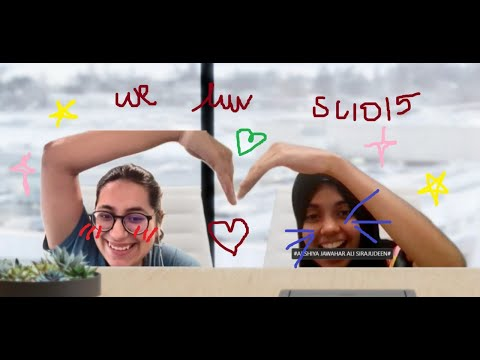

In [26]:
from IPython.display import YouTubeVideo

YouTubeVideo('f-r2OgWu92Y', width=800, height=300)

***

## Introduction 🩷

### The Game 👾

NetWalk is a game played on a 3x3 grid. Each unit in the grid has the following elements:
* House 🏠
* Water pipes 🔧
    * T-pipes
    * Corner pipes
    * Straight pipes
* Water Supply 🚿

The goal is to connect all the pipes so that water can flow from the water supply to all the homes.
 But here is the catch, all the pipes are misalligned, and the only way to get them in order is to rotate them at angles of 0, 90, 180, or 270, clockwise or counter clockwise. To win the game, you must make the supply water to all the houses with the least number of rotations and there should be no closed loops or open-ended wires 😁


### Importance of Finding a Solution 🧠

Why are we doing this? You may ask, why is it so important that we solve this issue 🤔

With rapid population growth, expansion and densification of cities, and complexity of systems, utilizing space to its fullest potential becomes a challenge. With limited resources, it is crucial to optimally manipulate resources and space (Metzler, n.d.). To resolve this issue, AI agents can be deployed to intelligently & logically deduct the best possible arrangements, optimizing for factors such as least number of rotations and permutations.

Some useful applications researched in this domain would be the use of AI for urban planning and designing of cities. With the constraints mentioned before, optimally using space with minimal effort is key for productive designing (Kamrowska-Załuska, 2021). Additionally, spatial reasoning with AI can be used to automate pipe layouts (Zhu & Latombe, 1991).

In such cases, AI agents can help in providing the most optimal arrangements with the least cost incurred while considering factors like the shape of elements, interconnectedness rules, and connectivity elements (De Biasi, 2012). 

### Aim 🦾

As a team, we aim to design and formulate an agent simulating pipeline arrangements for urban planning (water and sewer systems) 🤩

### Problem Formulation 🧮

> **Initial State** 🏁: All the elements in the grid are pre-determined. The rotations will be placed at 0 degrees

> **Goal State** ⛳: Rotate the elements by 0, 90, 180, 270 degrees, clockwise or anti-clockwise to match all the pipes and have a fully functioning water supply

> **Solution** 🌟: Configure the grid from the initial state to the goal state by rotating the tiles such that every house is connected to the water supply through the pipes, there are no closed loops, no pipes with unconnected endpoints, and the water supply has no unused pipes, with the least number of rotations possible.

***

# Results Abstract 🚀

| Search Algorithm | # Visited Nodes | # Nodes in Solution Path |
|----|----|---|
| A* Search | 4 | 4 |
| Greedy Search | 4 | 4|
| Iterative Deepening Search | 9 | 4 |
| Depth Limited Search | 9 | 4 |
| Uniform Cost Search | 12 | 4 |
| Depth First Search | 12 | 6 |
| Breadth First Search | 12 | 12 |

Greedy and A* Search are of the same efficiency due to the cost function being appropriate for the path lengths. Amongst uninformed search, DLS and IDS have gotten the best results!

***

## 7 Algorithms 💙

For this project, we will be taking a look at the implementation and visualisation of 7 algorithms. 5 of them are uninformed searches, and 2 of them are informed searches, namely:

**Informed Searches**
* Breadth-First Search
* Depth-First Search
* Depth Limited Search
* Uniform Cost Search
* Iterative Deepening Search

**Uninformed Searches**
* Greedy Search
* A* Search

### Importing Necessary Libraries 📗

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
from collections import deque
from queue import PriorityQueue
import heapq
import networkx as nx

### Visualizing the Game 🔍

For our game of netwalk, we are configuring a 3x3 grid with 2 houses, 1 water supply, and 2 different pipes. There are some differences between this and the original game. For instance, in the original game, you can rotate the houses and the water pipes as well. In our case, only the pipes are rotated. We are doing this in accordance to the criteria of having 20-120 states. for the current one, there are approximately 56 different actions that can be taken, and this is for the 2 pipes that we are rotating. Having more than 2 elements can cause it to be more complicated than the lab requires.

Another difference would be that not all the grids have elements in them. In a normal game of netwalk, all the grids have elements, but ours does not. Again, due to criteria constraints, we are miniminizing it to 2 pipes, 2 houses, and 1 water supply and the rest of the grids to be empty.

For the visualisation, we denote houses with a red square 🟥, the water supply with a blue circle 🔵, and the different pipes as grey lines.

Rotation of **corner pipes** (from left to right) at 0, 90, 180, 270 degrees

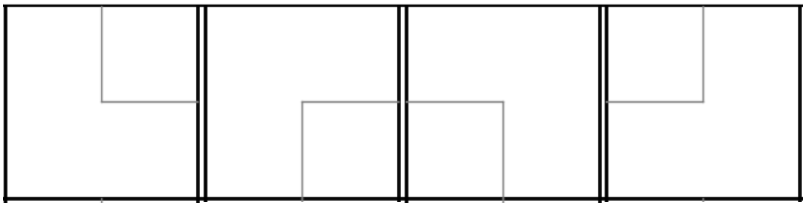

Rotation of **T-Pipes** (from left to right at 0, 90, 180, 270 degrees

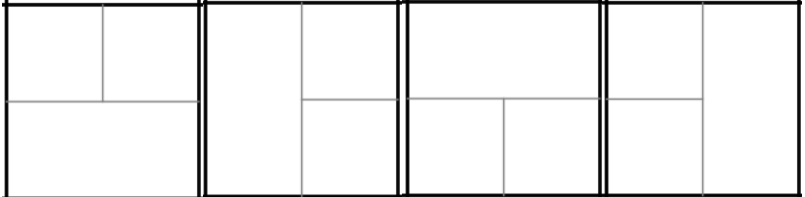

Rotation of **Straight pipes** (from left to right at 0, 90, 180, 270 degrees

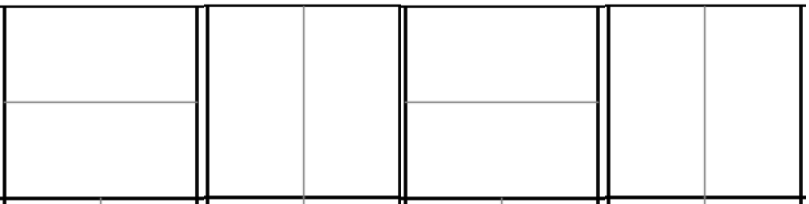

House and Water supply (from left to right)

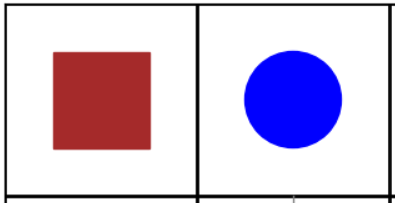

In [2]:
def visualize_netwalk(grid_config, rotations):
    grid_size = len(grid_config)
    tile_size = 1.0 / grid_size

    fig, ax = plt.subplots(figsize=(6, 6))

    # Draw grid lines
    for i in range(grid_size + 1):
        ax.axhline(i * tile_size, color='black', linewidth=2)
        ax.axvline(i * tile_size, color='black', linewidth=2)

    # Draw elements
    for i in range(grid_size):
        for j in range(grid_size):
            element = grid_config[i][j]
            rotation = rotations[i][j]
            x = j * tile_size
            y = (grid_size - 1 - i) * tile_size  # Invert y-axis to match grid_config indexing

            if element == 'House':
                house_size = tile_size / 2
                ax.add_patch(Rectangle((x + tile_size / 4, y + tile_size / 4), house_size, house_size, fill=True, color='brown'))
            elif element == 'Pipe':
                if (rotation == 0) | (rotation == 180):
                    ax.add_line(plt.Line2D((x, x + tile_size), (y + tile_size/2, y + tile_size/2), color='gray', linewidth=1))
                elif (rotation == 90 ) | (rotation == 270):
                    ax.add_line(plt.Line2D((x + tile_size/2, x + tile_size/2), (y, y + tile_size), color='gray', linewidth=1))
    
            elif element == 'Corner Pipe':
                if rotation == 90:
                    ax.add_line(plt.Line2D((x + tile_size/2, x + tile_size/2), (y, y + tile_size/2), color='gray', linewidth=1))
                    ax.add_line(plt.Line2D((x + tile_size, x + tile_size/2), (y + tile_size/2, y + tile_size/2), color='gray', linewidth=1))  # Flipped horizontally
                elif rotation == 180:
                    ax.add_line(plt.Line2D((x + tile_size/2, x + tile_size/2), (y, y + tile_size/2), color='gray', linewidth=1))
                    ax.add_line(plt.Line2D((x, x + tile_size/2), (y + tile_size/2, y + tile_size/2), color='gray', linewidth=1))
                elif rotation == 270:
                    ax.add_line(plt.Line2D((x + tile_size/2, x + tile_size/2), (y + tile_size, y + tile_size/2), color='gray', linewidth=1))  # Flipped vertically
                    ax.add_line(plt.Line2D((x, x + tile_size/2), (y + tile_size/2, y + tile_size/2), color='gray', linewidth=1))
                elif rotation == 0:
                    ax.add_line(plt.Line2D((x + tile_size/2, x + tile_size/2), (y + tile_size, y + tile_size/2), color='gray', linewidth=1))  # Flipped vertically
                    ax.add_line(plt.Line2D((x + tile_size, x + tile_size/2), (y + tile_size/2, y + tile_size/2), color='gray', linewidth=1))
            
            elif element == 'T-Pipe':
                if rotation == 90:
                    ax.add_line(plt.Line2D((x + tile_size/2, x + tile_size/2), (y, y + tile_size), color='gray', linewidth=1))
                    ax.add_line(plt.Line2D((x + tile_size/2, x + tile_size), (y + tile_size/2, y + tile_size/2), color='gray', linewidth=1))
                elif rotation == 180:
                    ax.add_line(plt.Line2D((x, x + tile_size), (y + tile_size/2, y + tile_size/2), color='gray', linewidth=1))
                    ax.add_line(plt.Line2D((x + tile_size/2, x + tile_size/2), (y, y + tile_size/2), color='gray', linewidth=1))
                elif rotation == 270:
                    ax.add_line(plt.Line2D((x + tile_size/2, x + tile_size/2), (y, y + tile_size), color='gray', linewidth=1))
                    ax.add_line(plt.Line2D((x, x + tile_size/2), (y + tile_size/2, y + tile_size/2), color='gray', linewidth=1))
                elif rotation == 0:
                    ax.add_line(plt.Line2D((x, x + tile_size), (y + tile_size/2, y + tile_size/2), color='gray', linewidth=1))
                    ax.add_line(plt.Line2D((x + tile_size/2, x + tile_size/2), (y + tile_size/2, y + tile_size), color='gray', linewidth=1))
                    
            elif element == 'Water Supply':
                ax.add_patch(Circle((x + tile_size/2, y + tile_size/2), tile_size/4, fill=True, color='blue'))
            elif element == 'Empty':
                pass

    ax.set_title("Netwalk Game")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')

    plt.show()


The function takes in a grid (this is suitable for a 3x3 grid) and for each unit in the grid, it requires the element to be placed. So a grid configuration like

$$
    ['House', 'Corner Pipe', 'Empty'],
    ['Empty', 'T-Pipe', 'House'],
    ['Empty', 'Water Supply', 'Empty']
$$

Would be the correct representation if you wanted house, corner pipe, and an empty unit in the first row, an empty unit, a t pipe, and a house in teh second row, and an empty unity, a water supply, and another empty unity in the third row.

Additionally, you would need to provide the rotations in the same 2D list respective of each element. For instance a rotation nested list like this:

$$
    [0, 90, 0],
    [180, 0, 0],
    [0, 0, 270]
$$

Would mean that the tiles will be rotated in those degrees.

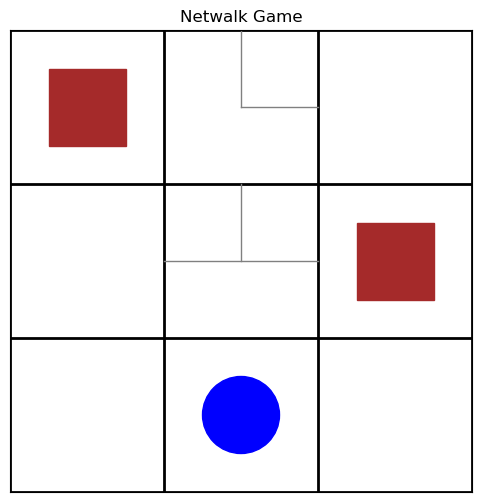

In [3]:
# grid configuration
grid_config = [
    ['House', 'Corner Pipe', 'Empty'],
    ['Empty', 'T-Pipe', 'House'],
    ['Empty', 'Water Supply', 'Empty']
]

# Jumbled Rotations
rotations = [
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0]
]

# Visualize the grid
visualize_netwalk(grid_config, rotations)

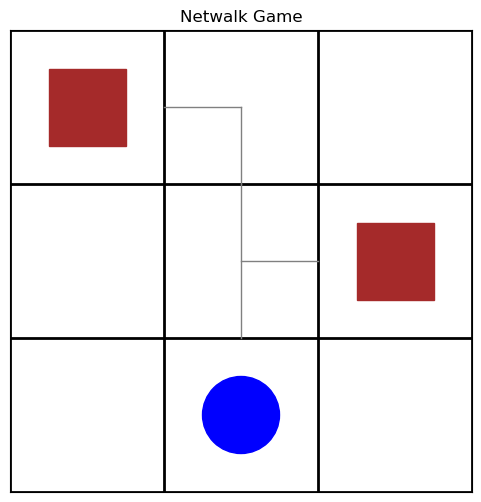

In [4]:
# Solved Rotations

rotations = [
    [0, 180, 0],
    [0, 90, 0],
    [0, 0, 0]
]

# Visualize the grid
visualize_netwalk(grid_config, rotations)

### Graph Representation of the States 📈

Now, we need to consider all the possible states that the game could potentially be in from the given arrangement. For instance, there could be different rotations for the pipes, and different combination of those rotations.

In our case, since there are 4 possible rotations for each tile and there are 2 tiles that need to be rotated, there are a total of 16 states the game could take.

Below is the visualisation of the different states as the game.

In [5]:
def generate_successors():
    successors = []

    # Define the initial state
    initial_state = [
        ['House', 0, 'Empty'],
        ['Empty', 0, 'House'],
        ['Empty', 'Water Supply', 'Empty']
    ]

    # Generate successors by rotating the second element in the first row
    for rotation in [0, 90, 180, 270]:
        # Create a copy of the initial state
        successor = [row[:] for row in initial_state]
        # Rotate the second element in the first row
        successor[0][1] = rotation
        # Convert string elements to 0
        for row in successor:
            for i, val in enumerate(row):
                if isinstance(val, str):
                    row[i] = 0
        successors.append(successor)

    # Generate children for successors 1, 2, 3, and 4
    for i in range(4):
        children_successor = []
        for rotation in [90, 180, 270]:
            child = [row[:] for row in successors[i]]  # Create a copy of successor
            child[1][1] = rotation
            # Convert string elements to 0
            for row in child:
                for j, val in enumerate(row):
                    if isinstance(val, str):
                        row[j] = 0
            children_successor.append(child)
        successors.extend(children_successor)

    return successors


[[[0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 90, 0], [0, 0, 0], [0, 0, 0]], [[0, 180, 0], [0, 0, 0], [0, 0, 0]], [[0, 270, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 90, 0], [0, 0, 0]], [[0, 0, 0], [0, 180, 0], [0, 0, 0]], [[0, 0, 0], [0, 270, 0], [0, 0, 0]], [[0, 90, 0], [0, 90, 0], [0, 0, 0]], [[0, 90, 0], [0, 180, 0], [0, 0, 0]], [[0, 90, 0], [0, 270, 0], [0, 0, 0]], [[0, 180, 0], [0, 90, 0], [0, 0, 0]], [[0, 180, 0], [0, 180, 0], [0, 0, 0]], [[0, 180, 0], [0, 270, 0], [0, 0, 0]], [[0, 270, 0], [0, 90, 0], [0, 0, 0]], [[0, 270, 0], [0, 180, 0], [0, 0, 0]], [[0, 270, 0], [0, 270, 0], [0, 0, 0]]] 

State 1:
[[0, 0, 0], [0, 0, 0], [0, 0, 0]]


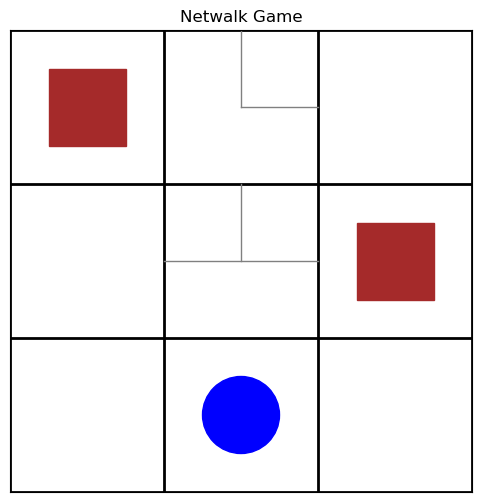


State 2:
[[0, 90, 0], [0, 0, 0], [0, 0, 0]]


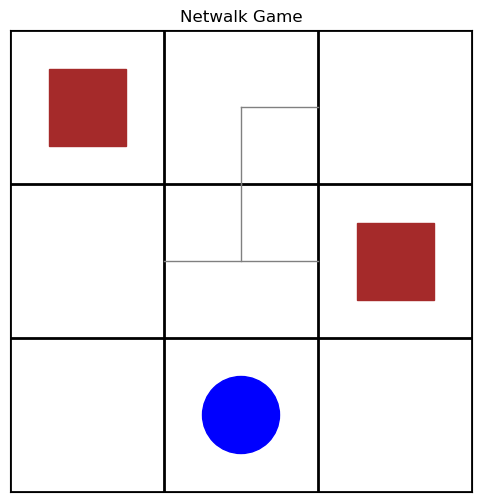


State 3:
[[0, 180, 0], [0, 0, 0], [0, 0, 0]]


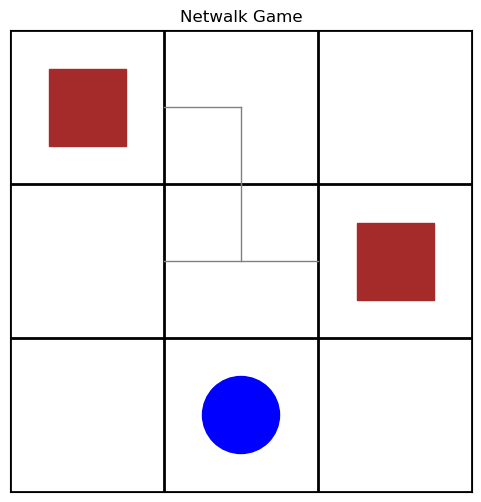


State 4:
[[0, 270, 0], [0, 0, 0], [0, 0, 0]]


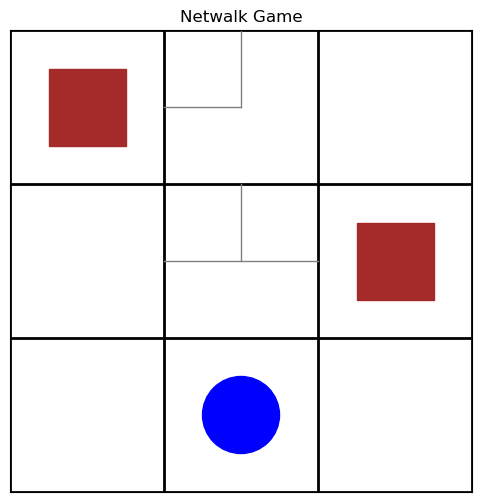


State 5:
[[0, 0, 0], [0, 90, 0], [0, 0, 0]]


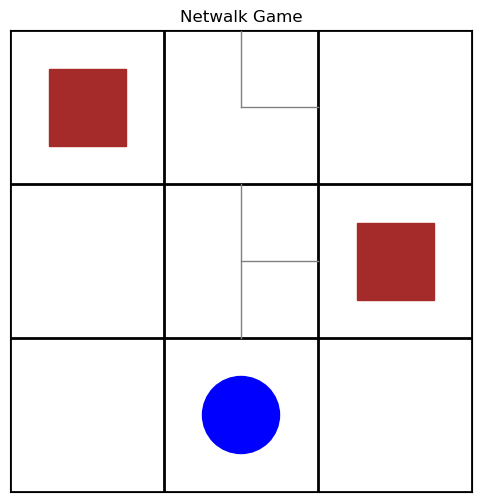


State 6:
[[0, 0, 0], [0, 180, 0], [0, 0, 0]]


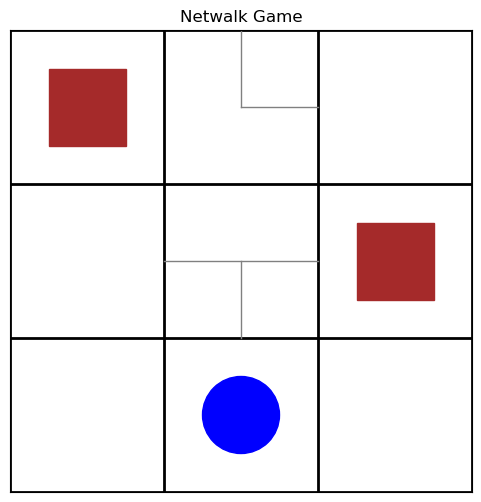


State 7:
[[0, 0, 0], [0, 270, 0], [0, 0, 0]]


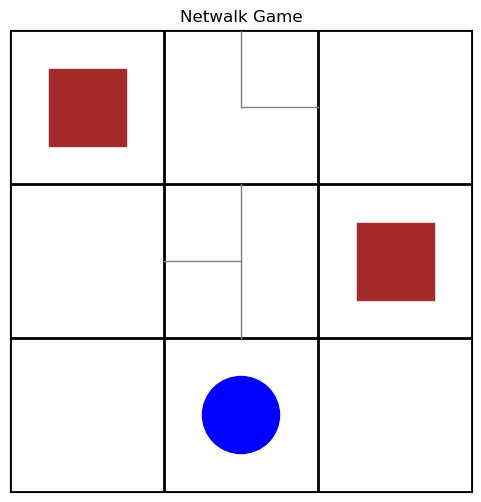


State 8:
[[0, 90, 0], [0, 90, 0], [0, 0, 0]]


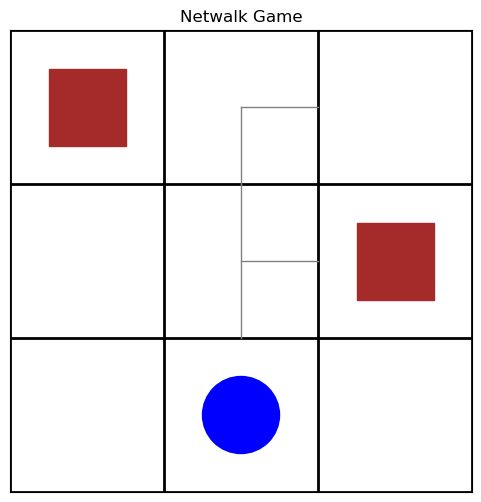


State 9:
[[0, 90, 0], [0, 180, 0], [0, 0, 0]]


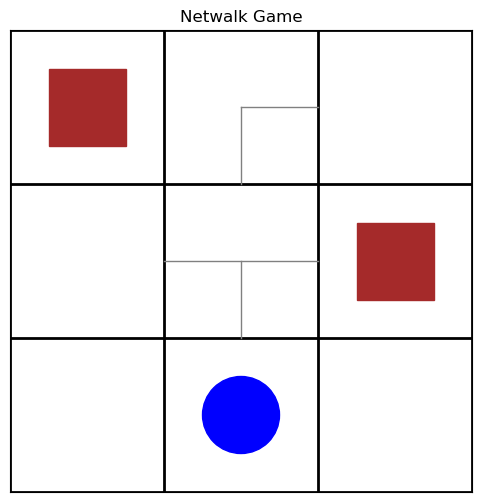


State 10:
[[0, 90, 0], [0, 270, 0], [0, 0, 0]]


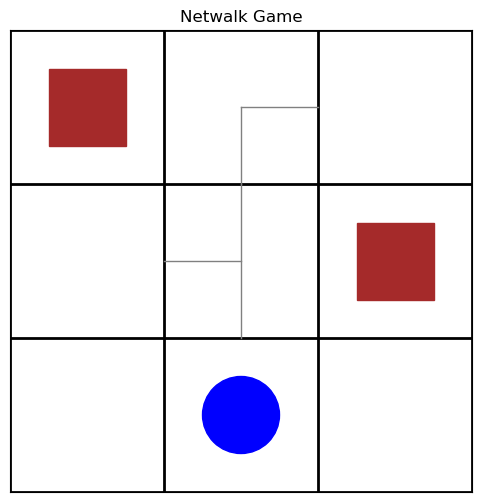


State 11:
[[0, 180, 0], [0, 90, 0], [0, 0, 0]]


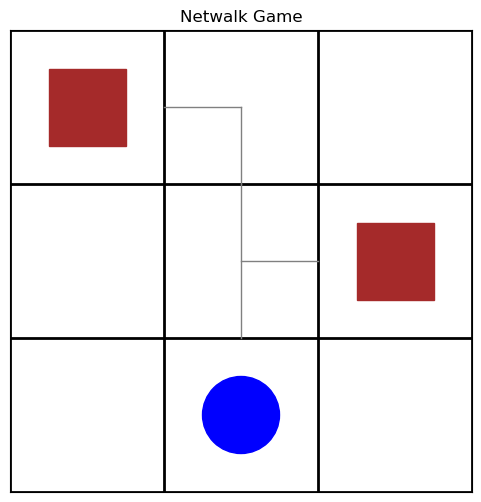


State 12:
[[0, 180, 0], [0, 180, 0], [0, 0, 0]]


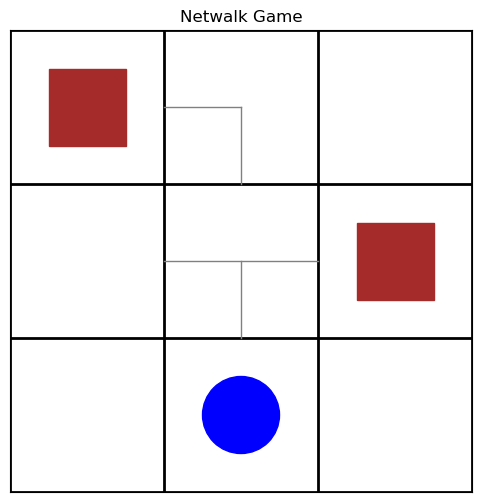


State 13:
[[0, 180, 0], [0, 270, 0], [0, 0, 0]]


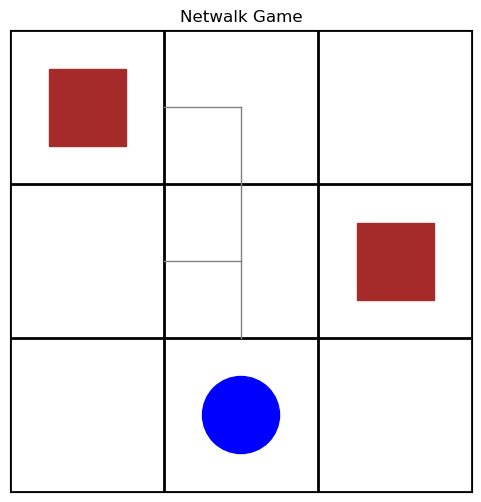


State 14:
[[0, 270, 0], [0, 90, 0], [0, 0, 0]]


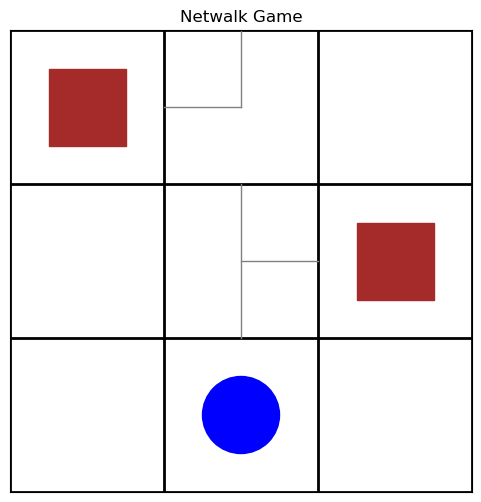


State 15:
[[0, 270, 0], [0, 180, 0], [0, 0, 0]]


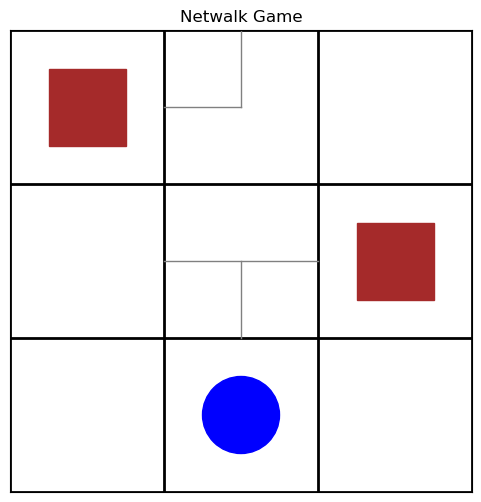


State 16:
[[0, 270, 0], [0, 270, 0], [0, 0, 0]]


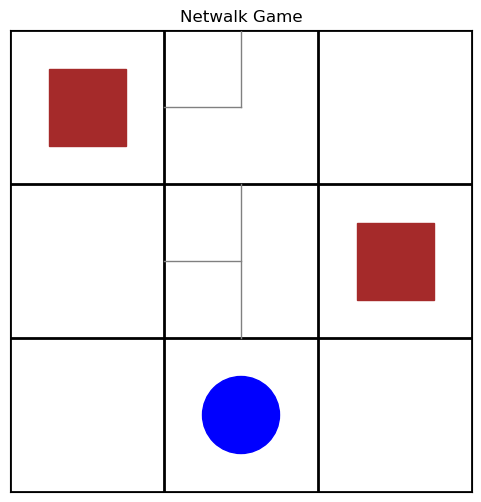

In [6]:
successors = generate_successors()

print(successors,'\n')

for idx, successor in enumerate(successors):
    print(f"State {idx + 1}:")
    
    print(successor)
    visualize_netwalk(grid_config, successor)
    print()

For any algorithm to work, we would need to represent the states as a graph. Since ours is more based on the rotations of the tiles and not necessarily the environment, we will be taking the rotations as nodes, and possible next rotations as neighbouring nodes.

For the graph, we have created a dictionary, where the keys are the states the game could potentially be in, and the value pair are the possible next rotations the game could follow. For instance, if the key is (0,90,0), then the next possible states (the values) could be 90 degrees clockwise (0,180,0) or 90 degrees counter clockwise (0,0,0).

This way, we have the nodes and the neighbouring nodes defined as next possible rotation and the different combination it can have with the two tiles

In [7]:
#graph without cost
graphG = {
   
    ((0, 0, 0), (0, 0, 0), (0, 0, 0)): [
        ((0, 90, 0), (0, 0, 0), (0, 0, 0)), 
        ((0, 270, 0), (0, 0, 0), (0, 0, 0)),
        ((0, 0, 0), (0, 90, 0), (0, 0, 0)),
        ((0, 0, 0), (0, 270, 0), (0, 0, 0))
    ],
    
    ((0, 0, 0), (0, 90, 0), (0, 0, 0)): [
        ((0, 270, 0), (0, 90, 0), (0, 0, 0)),
        ((0, 90, 0), (0, 90, 0), (0, 0, 0)),
        ((0, 0, 0), (0, 180, 0), (0, 0, 0)), 
        ((0, 0, 0), (0, 0, 0), (0, 0, 0))
    ],
        
    ((0, 0, 0), (0, 180, 0), (0, 0, 0)): [
        ((0, 90, 0), (0, 180, 0), (0, 0, 0)),
        ((0, 270, 0), (0, 180, 0), (0, 0, 0)),
        ((0, 0, 0), (0, 270, 0), (0, 0, 0)), 
        ((0, 0, 0), (0, 90, 0), (0, 0, 0)) 
    ],
        
    ((0, 0, 0), (0, 270, 0), (0, 0, 0)): [
        ((0, 270, 0), (0, 270, 0), (0, 0, 0)),
        ((0, 90, 0), (0, 270, 0), (0, 0, 0)),
        ((0, 0, 0), (0, 180, 0), (0, 0, 0)), 
        ((0, 0, 0), (0, 0, 0), (0, 0, 0))
    ],
    
    
    ((0, 90, 0), (0, 0, 0), (0, 0, 0)): [
        ((0, 0, 0), (0, 0, 0), (0, 0, 0)),
        ((0, 180, 0), (0, 0, 0), (0, 0, 0)),
        ((0, 90, 0), (0, 90, 0), (0, 0, 0)), 
        ((0, 90, 0), (0, 270, 0), (0, 0, 0)),
        
    ],
    ((0, 90, 0), (0, 90, 0), (0, 0, 0)): [
        ((0, 90, 0), (0, 180, 0), (0, 0, 0)), 
        ((0, 90, 0), (0, 0, 0), (0, 0, 0)), 
        ((0, 180, 0), (0, 90, 0), (0, 0, 0)), 
        ((0, 0, 0), (0, 90, 0), (0, 0, 0))
    ],
        
    ((0, 90, 0), (0, 180, 0), (0, 0, 0)): [
        ((0, 90, 0), (0, 90, 0), (0, 0, 0)), 
        ((0, 90, 0), (0, 270, 0), (0, 0, 0)), 
        ((0, 180, 0), (0, 270, 0), (0, 0, 0)), 
        ((0, 0, 0), (0, 270, 0), (0, 0, 0))
    ],
    
    ((0, 90, 0), (0, 270, 0), (0, 0, 0)) : [
        ((0, 180, 0), (0, 270, 0), (0, 0, 0)),
        ((0, 0, 0), (0, 270, 0), (0, 0, 0)),
        ((0, 90, 0), (0, 180, 0), (0, 0, 0)),
        ((0, 90, 0), (0, 0, 0), (0, 0, 0))
    ],
    
    ((0, 180, 0), (0, 0, 0), (0, 0, 0)): [
        ((0, 270, 0), (0, 0, 0), (0, 0, 0)),
        ((0, 90, 0), (0, 0, 0), (0, 0, 0)),
        ((0, 180, 0), (0, 90, 0), (0, 0, 0)), 
        ((0, 180, 0), (0, 270, 0), (0, 0, 0))
    ],
    
    ((0, 180, 0), (0, 90, 0), (0, 0, 0)): [
        ((0, 90, 0), (0, 90, 0), (0, 0, 0)),
        ((0, 270, 0), (0, 90, 0), (0, 0, 0)),
        ((0, 180, 0), (0, 180, 0), (0, 0, 0)),
        ((0, 180, 0), (0, 0, 0), (0, 0, 0))
    ],
    
    ((0, 180, 0), (0, 180, 0), (0, 0, 0)): [
        ((0, 90, 0), (0, 180, 0), (0, 0, 0)),
        ((0, 270, 0), (0, 180, 0), (0, 0, 0)),
        ((0, 180, 0), (0, 90, 0), (0, 0, 0)),
        ((0, 180, 0), (0, 270, 0), (0, 0, 0))
    ],
    
    ((0, 180, 0), (0, 270, 0), (0, 0, 0)) : [
        ((0, 90, 0), (0, 270, 0), (0, 0, 0)),
        ((0, 270, 0), (0, 270, 0), (0, 0, 0)),
        ((0, 180, 0), (0, 180, 0), (0, 0, 0)),
        ((0, 180, 0), (0, 0, 0), (0, 0, 0))
    ],
    
    
    ((0, 270, 0), (0, 0, 0), (0, 0, 0)): [
        ((0, 180, 0), (0, 0, 0), (0, 0, 0)),
        ((0, 0, 0), (0, 0, 0), (0, 0, 0)),
        ((0, 270, 0), (0, 90, 0), (0, 0, 0)),  
        ((0, 270, 0), (0, 270, 0), (0, 0, 0)),
    ],
    
    ((0, 270, 0), (0, 90, 0), (0, 0, 0)): [
        ((0, 180, 0), (0, 90, 0), (0, 0, 0)),
        ((0, 0, 0), (0, 90, 0), (0, 0, 0)),
        ((0, 270, 0), (0, 0, 0), (0, 0, 0)), 
        ((0, 270, 0), (0, 180, 0), (0, 0, 0))
        
    ],
    
    ((0, 270, 0), (0, 180, 0), (0, 0, 0)): [
        ((0, 180, 0), (0, 180, 0), (0, 0, 0)),
        ((0, 0, 0), (0, 180, 0), (0, 0, 0)),
        ((0, 270, 0), (0, 90, 0), (0, 0, 0)),
        ((0, 270, 0), (0, 0, 0), (0, 0, 0))
    ],
    
    ((0, 270, 0), (0, 270, 0), (0, 0, 0)): [
        
        ((0, 180, 0), (0, 270, 0), (0, 0, 0)),
        ((0, 0, 0), (0, 270, 0), (0, 0, 0)),
        ((0, 270, 0), (0, 180, 0), (0, 0, 0)),
        ((0, 270, 0), (0, 0, 0), (0, 0, 0)), 
    ]
     
}


While the graph above can be used for most of the algorithms, it cannot be used for cost algorithms like uniform cost search or A* search. Hence we created a seperate graph with the cost function.

The reason why both of them were not combined and accessed by elements was because in some cases, there was a need to change the cost and the next possible rotation for testing to see whether the algorithm worked as intended. And since we did not want to mess up the other algorithms (when the neighbours changed) we used a seperate one instead. It is fine to use this graph and not access the cost element for other algorithms, it will work the same.

In [8]:
# with cost😢
graph = {
    ((0, 0, 0), (0, 0, 0), (0, 0, 0)): [
        (((0, 90, 0), (0, 0, 0), (0, 0, 0)), 1), 
        (((0, 270, 0), (0, 0, 0), (0, 0, 0)), 3),
        
        (((0, 0, 0), (0, 90, 0), (0, 0, 0)), 2),
        (((0, 0, 0), (0, 270, 0), (0, 0, 0)), 2)
    ],
    
    ((0, 0, 0), (0, 90, 0), (0, 0, 0)): [
        (((0, 270, 0), (0, 90, 0), (0, 0, 0)), 4),
        (((0, 90, 0), (0, 90, 0), (0, 0, 0)), 1),
        (((0, 0, 0), (0, 180, 0), (0, 0, 0)), 1), 
        (((0, 0, 0), (0, 0, 0), (0, 0, 0)), 1)
    ],
    
    ((0, 0, 0), (0, 180, 0), (0, 0, 0)): [
        (((0, 270, 0), (0, 180, 0), (0, 0, 0)), 5),
        (((0, 90, 0), (0, 180, 0), (0, 0, 0)), 2),
        (((0, 0, 0), (0, 270, 0), (0, 0, 0)), 2), 
        (((0, 0, 0), (0, 90, 0), (0, 0, 0)), 1) 
    ],
    
    ((0, 0, 0), (0, 270, 0), (0, 0, 0)): [
        (((0, 270, 0), (0, 270, 0), (0, 0, 0)), 5),
        (((0, 90, 0), (0, 270, 0), (0, 0, 0)), 2),
        (((0, 0, 0), (0, 180, 0), (0, 0, 0)), 1), 
        (((0, 0, 0), (0, 0, 0), (0, 0, 0)), 2)
    ],
    
    
    ((0, 90, 0), (0, 0, 0), (0, 0, 0)): [
        (((0, 0, 0), (0, 0, 0), (0, 0, 0)), 2),
        (((0, 180, 0), (0, 0, 0), (0, 0, 0)), 1),
        (((0, 90, 0), (0, 90, 0), (0, 0, 0)), 2), 
        (((0, 90, 0), (0, 270, 0), (0, 0, 0)), 1.5),
        
    ],
    ((0, 90, 0), (0, 90, 0), (0, 0, 0)): [
        (((0, 90, 0), (0, 180, 0), (0, 0, 0)), 2), 
        (((0, 90, 0), (0, 0, 0), (0, 0, 0)), 2), 
        (((0, 180, 0), (0, 90, 0), (0, 0, 0)), 1), 
        (((0, 0, 0), (0, 90, 0), (0, 0, 0)), 2)
    ],
    
    ((0, 90, 0), (0, 180, 0), (0, 0, 0)): [
        (((0, 90, 0), (0, 90, 0), (0, 0, 0)), 1), 
        (((0, 90, 0), (0, 270, 0), (0, 0, 0)), 2), 
        (((0, 180, 0), (0, 270, 0), (0, 0, 0)), 2), 
        (((0, 0, 0), (0, 270, 0), (0, 0, 0)), 2) 
    ],
    
    ((0, 90, 0), (0, 270, 0), (0, 0, 0)) : [
        (((0, 180, 0), (0, 270, 0), (0, 0, 0)), 1.5),
        (((0, 0, 0), (0, 270, 0), (0, 0, 0)), 2),
        (((0, 90, 0), (0, 180, 0), (0, 0, 0)), 1),
        (((0, 90, 0), (0, 0, 0), (0, 0, 0)), 2)
    ],
    
    ((0, 180, 0), (0, 0, 0), (0, 0, 0)): [
        (((0, 270, 0), (0, 0, 0), (0, 0, 0)), 3),
        (((0, 90, 0), (0, 0, 0), (0, 0, 0)), 3),
        (((0, 180, 0), (0, 90, 0), (0, 0, 0)), 1), 
        (((0, 180, 0), (0, 270, 0), (0, 0, 0)), 1.5)
    ],
    
    ((0, 180, 0), (0, 90, 0), (0, 0, 0)): [
        (((0, 90, 0), (0, 90, 0), (0, 0, 0)), 2),
        (((0, 270, 0), (0, 90, 0), (0, 0, 0)), 3),
        (((0, 180, 0), (0, 180, 0), (0, 0, 0)), 2),
        (((0, 180, 0), (0, 0, 0), (0, 0, 0)), 2)
    ],
    
    ((0, 180, 0), (0, 180, 0), (0, 0, 0)): [
        (((0, 90, 0), (0, 180, 0), (0, 0, 0)), 2),
        (((0, 270, 0), (0, 180, 0), (0, 0, 0)), 3),
        (((0, 180, 0), (0, 90, 0), (0, 0, 0)), 1),
        (((0, 180, 0), (0, 270, 0), (0, 0, 0)), 2)
    ],
    
    ((0, 180, 0), (0, 270, 0), (0, 0, 0)) : [
        (((0, 90, 0), (0, 270, 0), (0, 0, 0)), 2),
        (((0, 270, 0), (0, 270, 0), (0, 0, 0)), 3),
        (((0, 180, 0), (0, 180, 0), (0, 0, 0)), 2),
        (((0, 180, 0), (0, 0, 0), (0, 0, 0)), 2)
    ],
    
    
    ((0, 270, 0), (0, 0, 0), (0, 0, 0)): [
        (((0, 180, 0), (0, 0, 0), (0, 0, 0)), 1),
        (((0, 0, 0), (0, 0, 0), (0, 0, 0)), 2),
        (((0, 270, 0), (0, 90, 0), (0, 0, 0)), 3), 
        (((0, 270, 0), (0, 180, 0), (0, 0, 0)), 3), 
        (((0, 270, 0), (0, 270, 0), (0, 0, 0)), 2)
    ],
    
    ((0, 270, 0), (0, 90, 0), (0, 0, 0)): [
        (((0, 180, 0), (0, 90, 0), (0, 0, 0)), 1),
        (((0, 0, 0), (0, 90, 0), (0, 0, 0)), 2),
        (((0, 270, 0), (0, 0, 0), (0, 0, 0)), 2),
        (((0, 270, 0), (0, 180, 0), (0, 0, 0)), 3)
        
    ],
    
    ((0, 270, 0), (0, 180, 0), (0, 0, 0)): [
        (((0, 180, 0), (0, 180, 0), (0, 0, 0)), 1),
        (((0, 0, 0), (0, 180, 0), (0, 0, 0)), 2),
        (((0, 270, 0), (0, 90, 0), (0, 0, 0)), 2),
        (((0, 270, 0), (0, 0, 0), (0, 0, 0)), 3)
    ],
    
    ((0, 270, 0), (0, 270, 0), (0, 0, 0)): [
        
        (((0, 180, 0), (0, 270, 0), (0, 0, 0)), 1),
        (((0, 0, 0), (0, 270, 0), (0, 0, 0)), 3),
        (((0, 270, 0), (0, 180, 0), (0, 0, 0)), 3),
        (((0, 270, 0), (0, 0, 0), (0, 0, 0)), 2)
    ]
     
}

The colors of the arrows are as follows:
* **pink** arrows indicate **clockwise** rotation in the **first row**
* **blue** arrows indicate **anti-clockwise** rotation in the **first row**
* **purple** arrows indicate **clockwise** rotation in the **second row**
* **green** arrows indicate **anti-clockwise** rotation in **the second row**

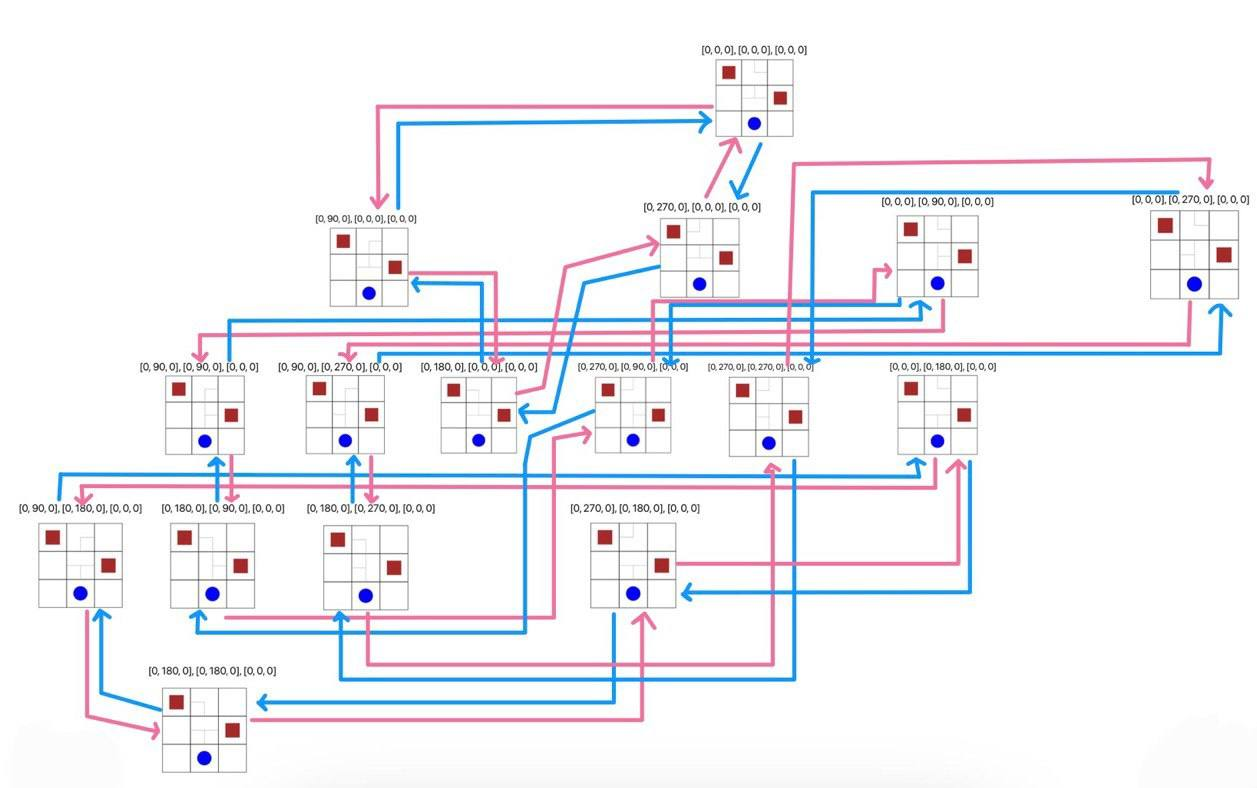

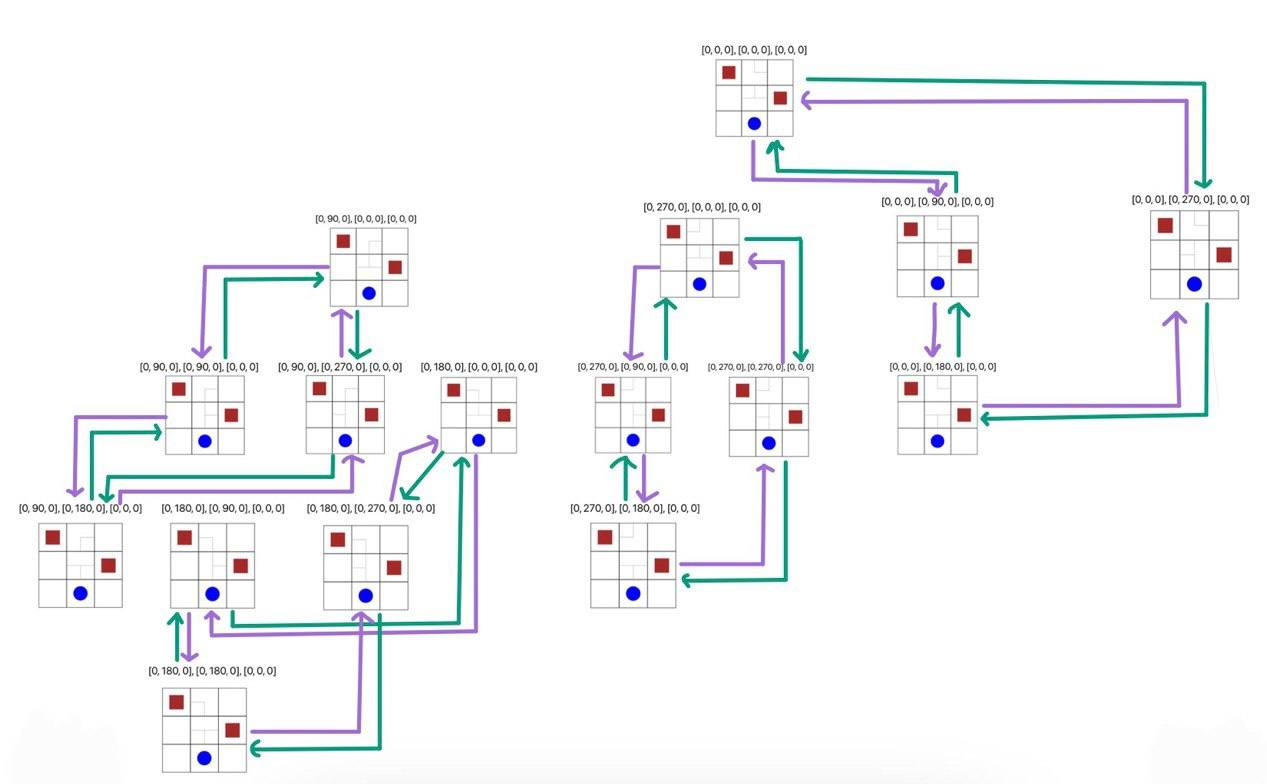

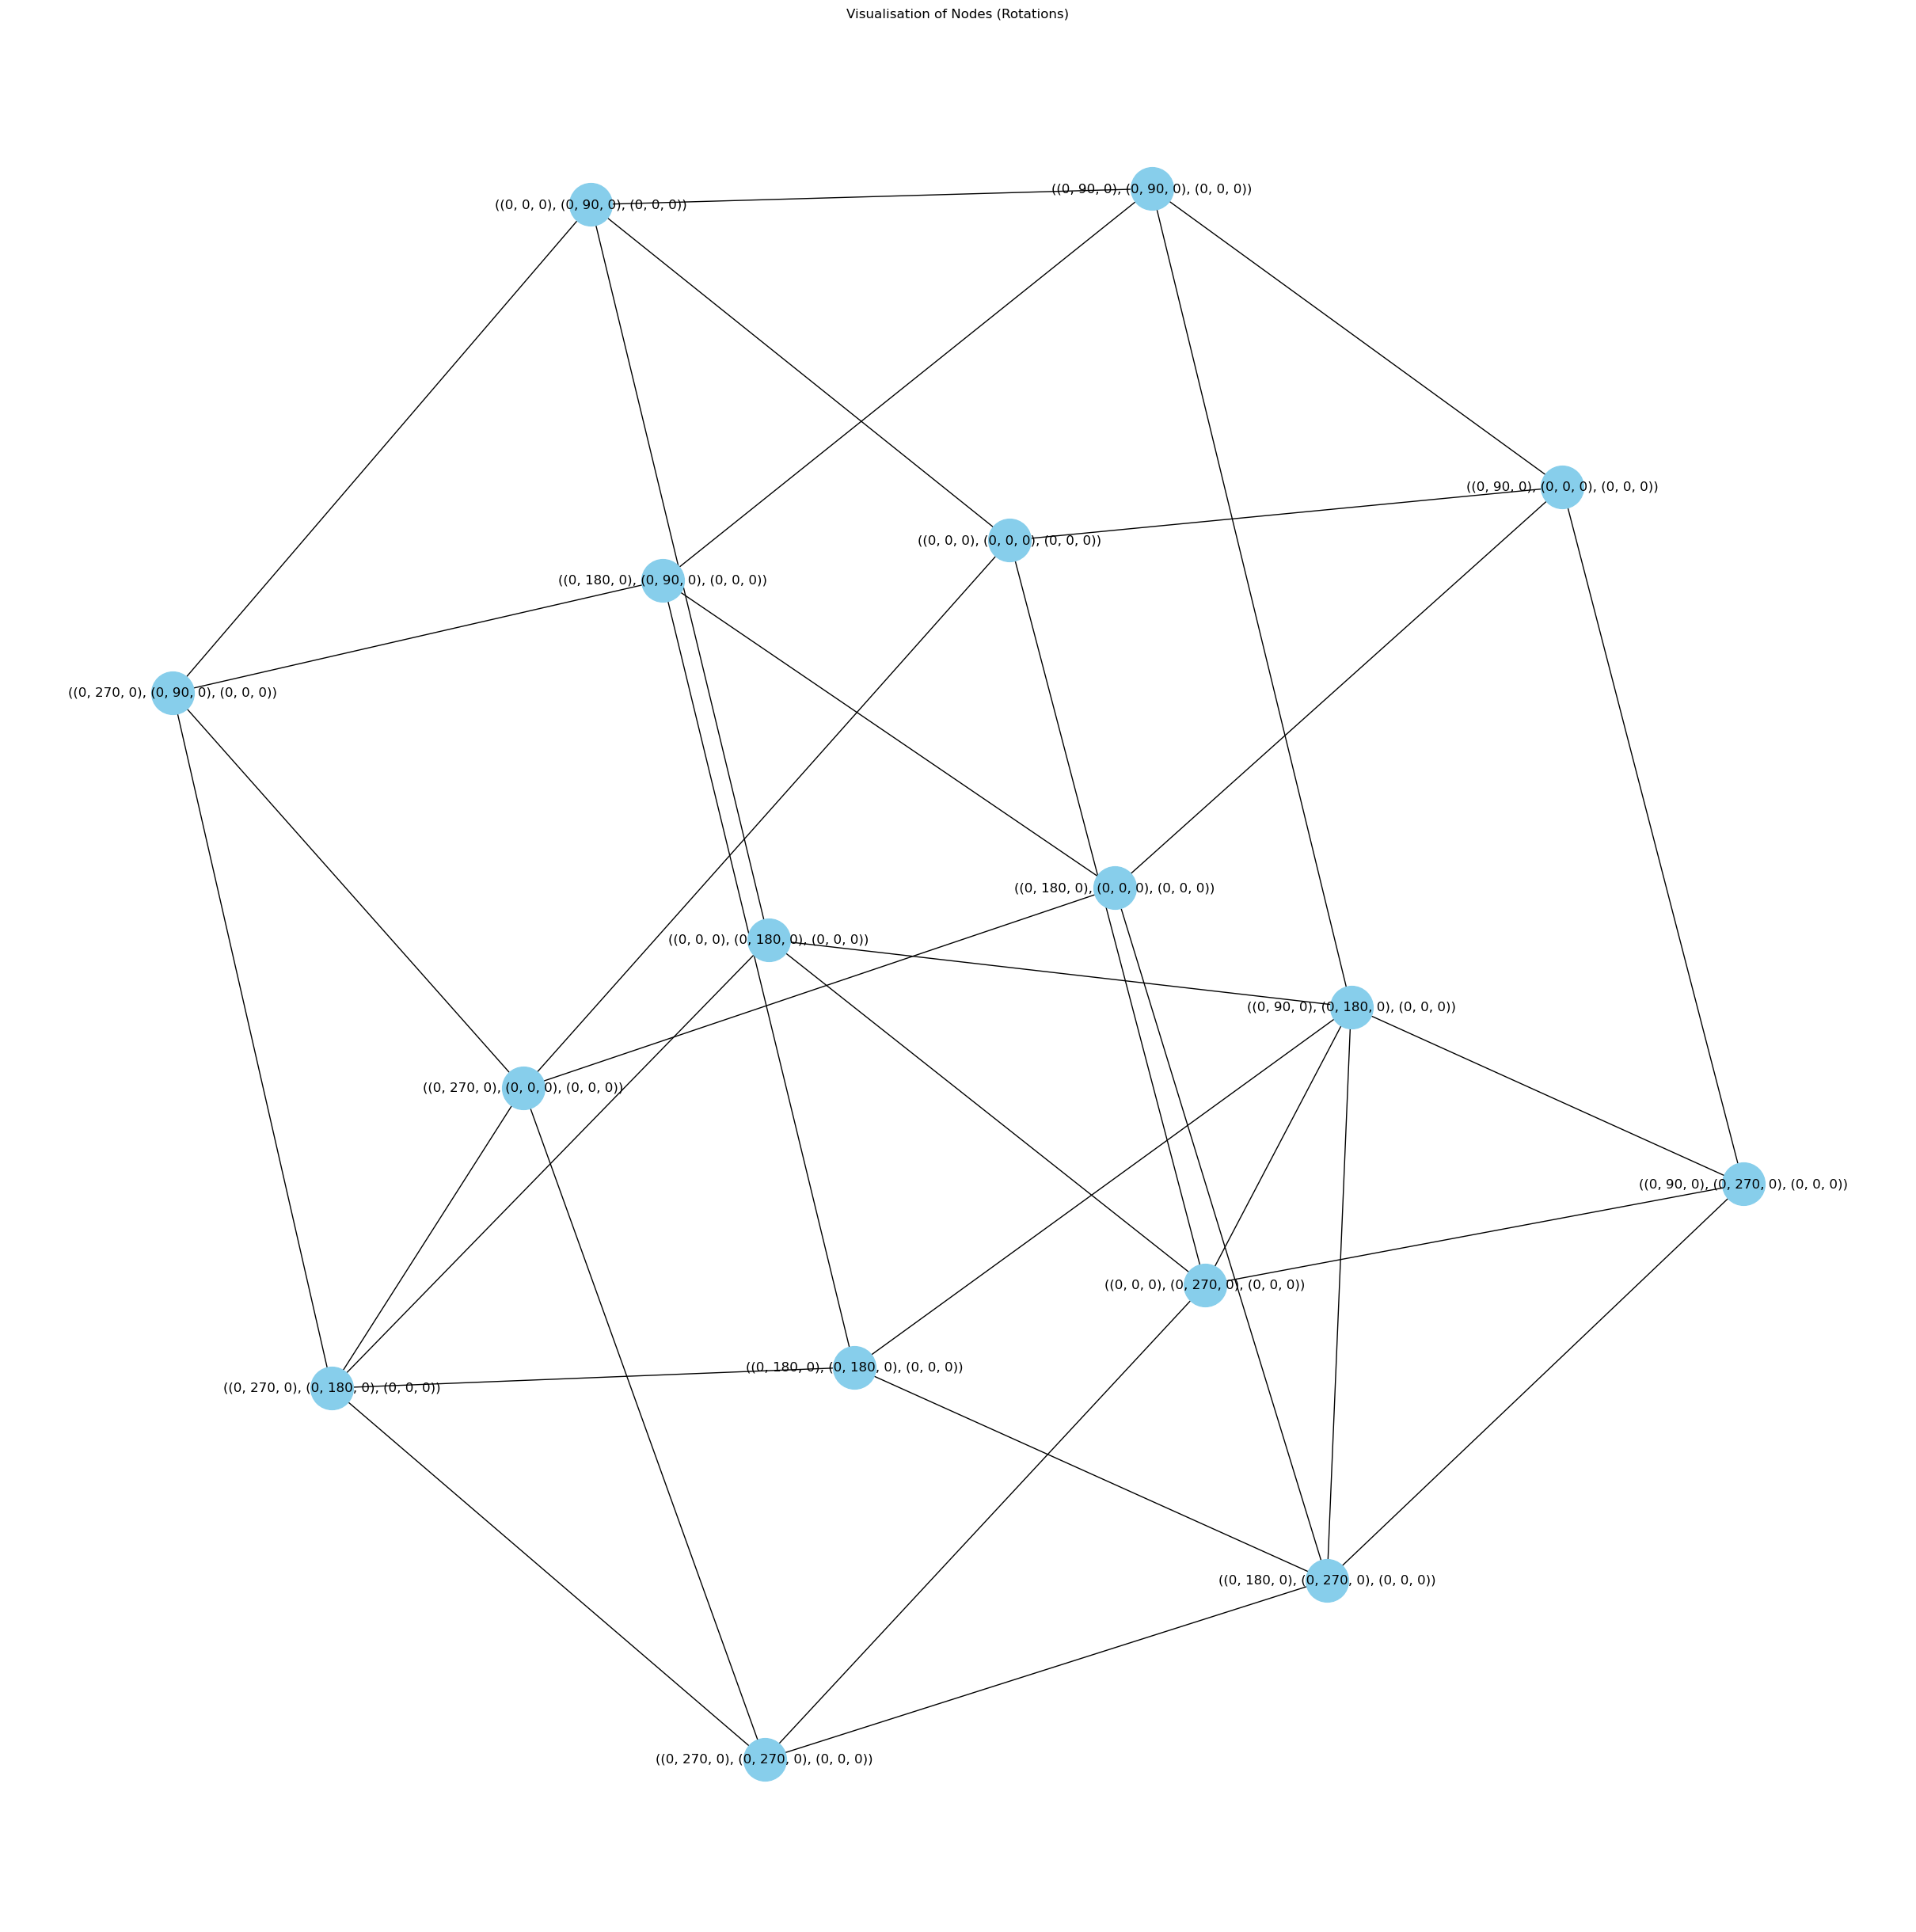

In [9]:
def visualize_graph(graph):
    G = nx.Graph()

    # Add nodes
    for node in graph.keys():
        G.add_node(node)

    # Add edges
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    # Draw the graph
    pos = nx.spring_layout(G, k=0.3, iterations=50)
    plt.figure(figsize=(24, 24))
    nx.draw(G, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=12)
    plt.title("Visualisation of Nodes (Rotations)")
    plt.show()

# Visualize the graph
visualize_graph(graphG)

Now with the foundation set, let us move to the algorithms ⛵

# Uninformed Searches 💚

Uniformed searches take only the problem definition provided, and has no information on any game hints. For instance, the only data fed would be the graph, initial, and final states.

In this section, we will be looking at the implementations of 5 different uninformed search algorithms:
* Breadth First Search
* Depth First Search
* Depth Limited Search
* Uniform Cost Search
* Iterative Deepening Search

Before we move onto the searches, let us declare the beginning and goal state so that it can be used throughout the notebook.

In [10]:
# Initial state
start_state = ((0, 0, 0), (0, 0, 0), (0, 0, 0))

# Goal state
goal_state = ((0, 180, 0), (0, 90, 0), (0, 0, 0))

## Breadth First Search 🍞

Breadth First Search (BFS) takes into consideration the the structure of the graph. It will visit the nodes by generation as shown below:

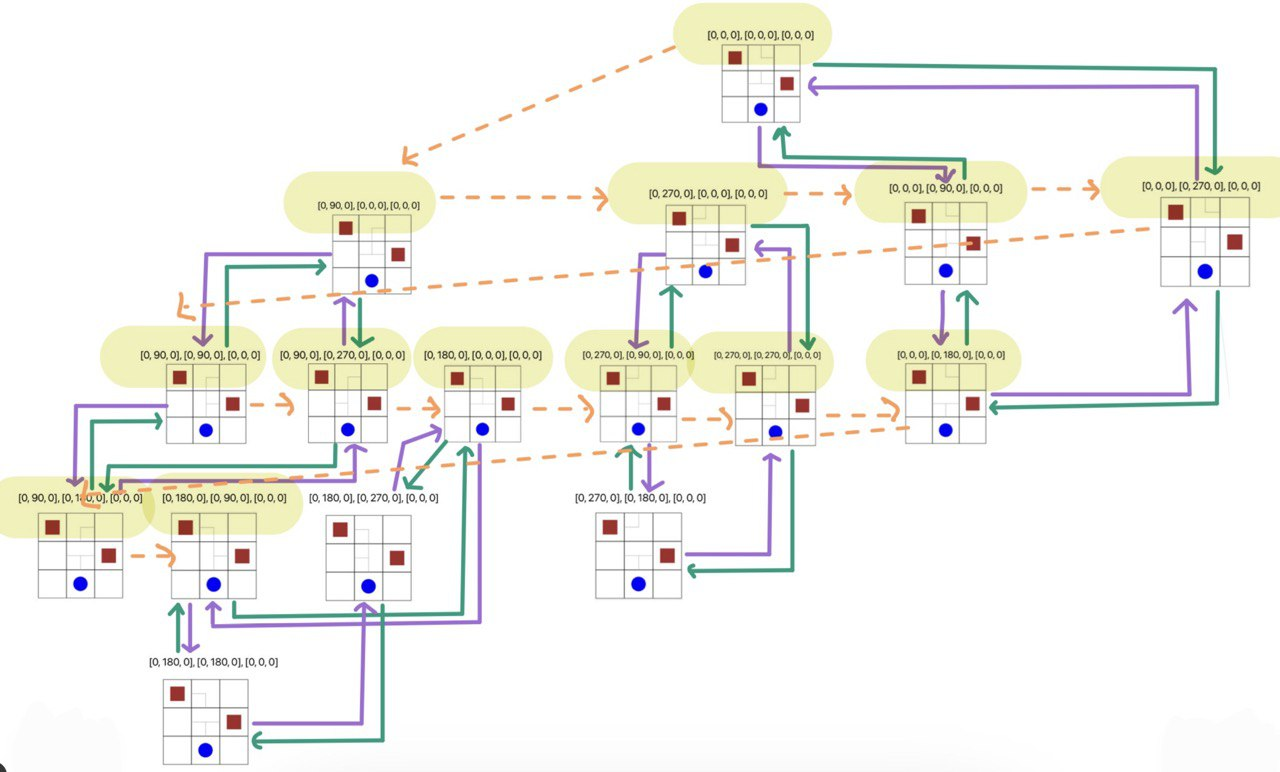

Ignore the left most one on the 4th row

In [11]:
from collections import deque

def bfs_with_visitedw(graph, start_state, goal_state):
    queue = deque()
    visited = set()
    visited_states = []

    # Enqueue the initial state
    queue.append(start_state)
    visited.add(start_state)

    while queue:
        current_state = queue.popleft()

        # Check if the goal state is reached
        if current_state == goal_state:
            visited_states.append(current_state)
            return current_state, visited_states

        # Enqueue unvisited neighbors
        for neighbor in graph[current_state]:
            if neighbor not in visited:
                queue.append(neighbor)
                visited.add(neighbor)

        # Add the current state to visited states after processing its neighbors
        visited_states.append(current_state)

    # Goal state not found
    return None, visited_states


In [12]:

def bfs_with_visited(graph, start_state, goal_state):
    queue = deque()
    visited = set()
    visited_states = set()
    
    # Enqueue the initial state
    queue.append(start_state)
    visited.add(start_state)
    
    while queue:
        current_state = queue.popleft()
        visited_states.add(current_state)
        
        # Check if the goal state is reached
        if current_state == goal_state:
            return current_state, visited_states
        
        # Enqueue unvisited neighbors
        for neighbor in graph[current_state]:
            if neighbor not in visited:
                queue.append(neighbor)
                visited.add(neighbor)
    
    # Goal state not found
    return None, visited_states


Total number of combinations: 56
Number of combinations made:  12
Percentage of combinations visited:  21.428571428571427 %
Total number of combinations for solution path:  12
Percentage of combinations in solution path:  21.428571428571427 %

Goal state found: ((0, 180, 0), (0, 90, 0), (0, 0, 0))

Visited states: [((0, 0, 0), (0, 0, 0), (0, 0, 0)), ((0, 90, 0), (0, 0, 0), (0, 0, 0)), ((0, 270, 0), (0, 0, 0), (0, 0, 0)), ((0, 0, 0), (0, 90, 0), (0, 0, 0)), ((0, 0, 0), (0, 270, 0), (0, 0, 0)), ((0, 180, 0), (0, 0, 0), (0, 0, 0)), ((0, 90, 0), (0, 90, 0), (0, 0, 0)), ((0, 90, 0), (0, 270, 0), (0, 0, 0)), ((0, 270, 0), (0, 90, 0), (0, 0, 0)), ((0, 270, 0), (0, 270, 0), (0, 0, 0)), ((0, 0, 0), (0, 180, 0), (0, 0, 0)), ((0, 180, 0), (0, 90, 0), (0, 0, 0))]


Solution Path:
((0, 0, 0), (0, 0, 0), (0, 0, 0))


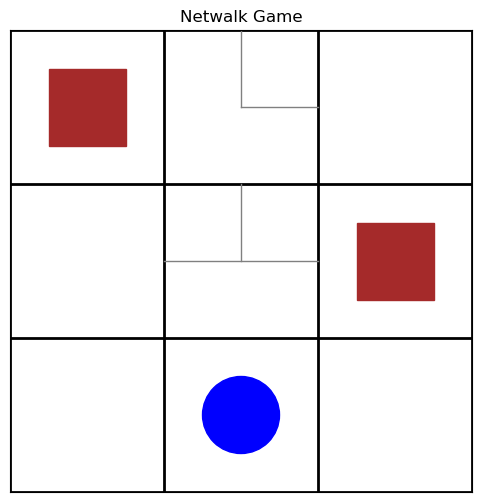

((0, 90, 0), (0, 0, 0), (0, 0, 0))


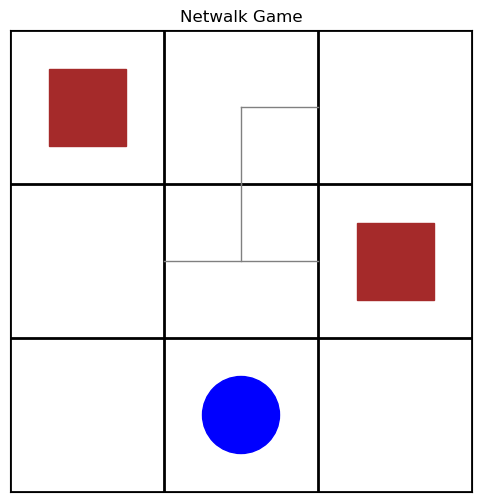

((0, 270, 0), (0, 0, 0), (0, 0, 0))


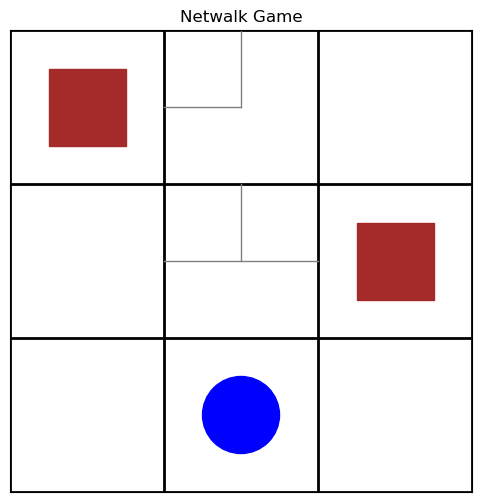

((0, 0, 0), (0, 90, 0), (0, 0, 0))


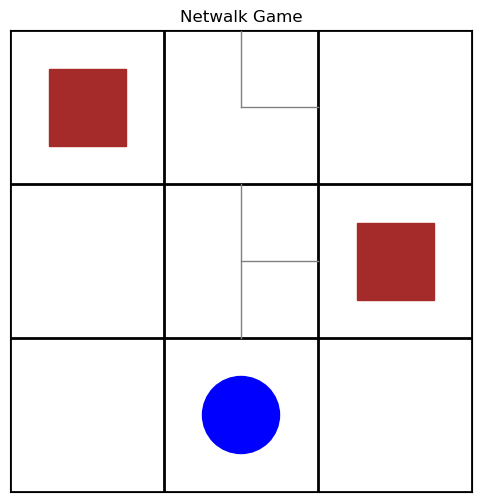

((0, 0, 0), (0, 270, 0), (0, 0, 0))


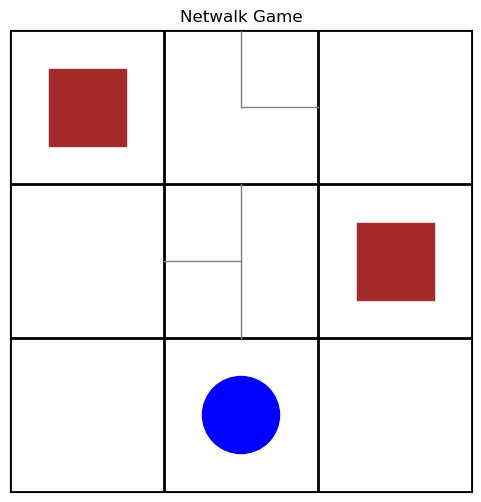

((0, 180, 0), (0, 0, 0), (0, 0, 0))


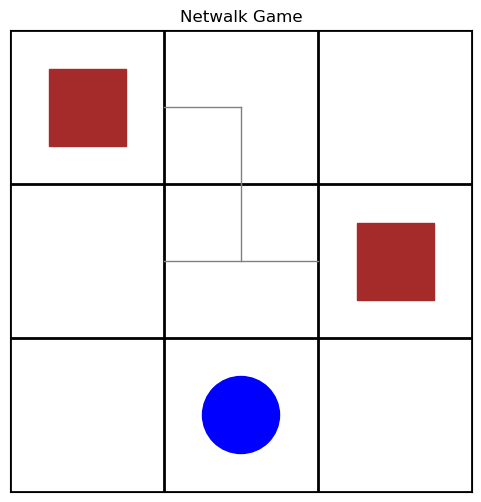

((0, 90, 0), (0, 90, 0), (0, 0, 0))


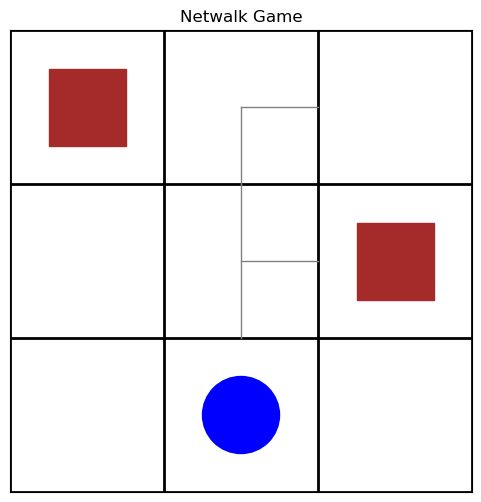

((0, 90, 0), (0, 270, 0), (0, 0, 0))


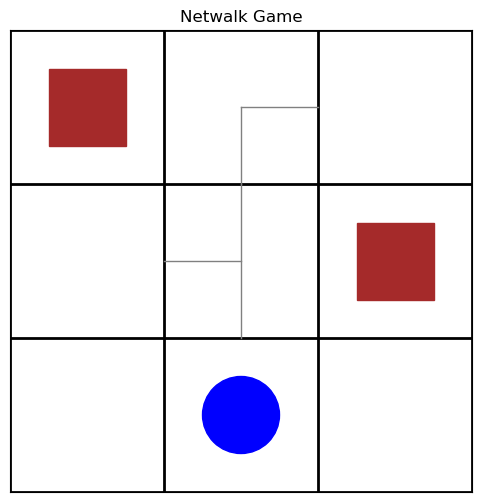

((0, 270, 0), (0, 90, 0), (0, 0, 0))


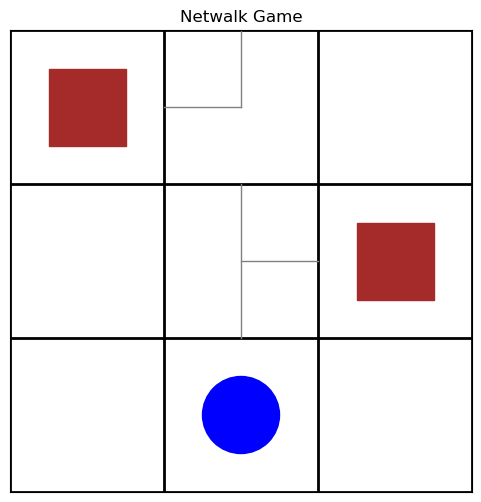

((0, 270, 0), (0, 270, 0), (0, 0, 0))


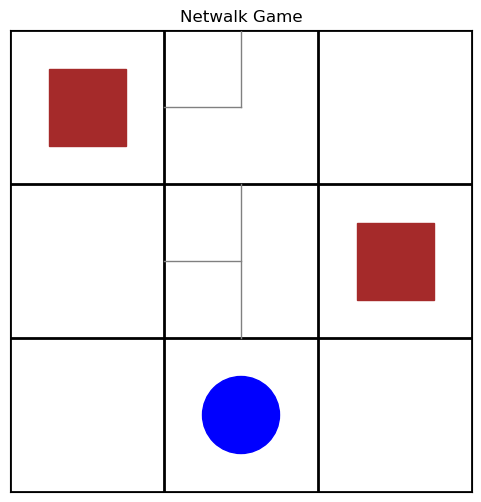

((0, 0, 0), (0, 180, 0), (0, 0, 0))


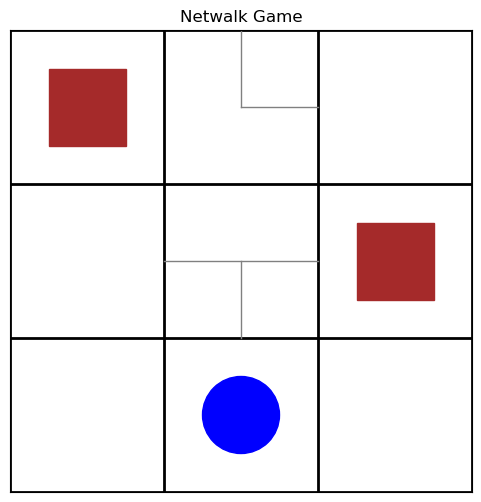

((0, 180, 0), (0, 90, 0), (0, 0, 0))


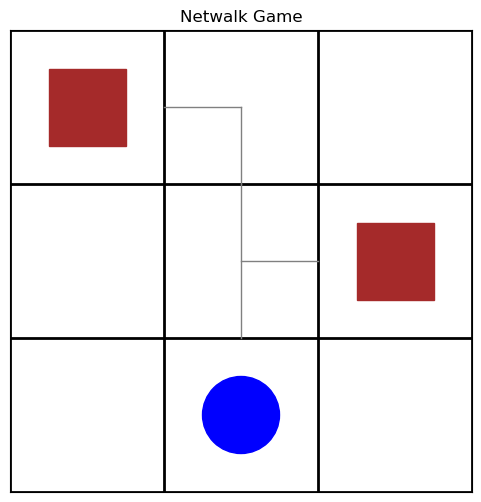

In [13]:
# Perform BFS
goal_state_found, visited_states = bfs_with_visitedw(graphG, start_state, goal_state)

print("Total number of combinations: 56")
print("Number of combinations made: ", len(visited_states))
print("Percentage of combinations visited: ", ((len(visited_states) )/(56))*100, "%")
print("Total number of combinations for solution path: ", len(visited_states))
print("Percentage of combinations in solution path: ", ((len(visited_states))/(56))*100, "%")
print()

if goal_state_found:
    print("Goal state found:", goal_state_found)
    print()
else:
    print("Goal state not reachable.")

print("Visited states:", visited_states)
print()
print("\nSolution Path:")
for state in visited_states:
    print(state)
    visualize_netwalk(grid_config, state)

Technically, BFS is supposed to be more efficient. However, in our case it seems to not be very efficient, and the main reason would be the structure of the graph. Since the graph diverges to a lot more different combinations, hence it is more ineffective to visit by generation.

This may not be the case for all BFS, but in our case, it seems to be the most inefficient one.

## Depth First Search 🌊

Depth First Search (DFS) takes into consideration the graph structure. It traverses the nodes through the children, and when there are no more children, it backtracks and goes to the children of the remaining node. Here is a good example on the order of nodes accessed in a DFS:

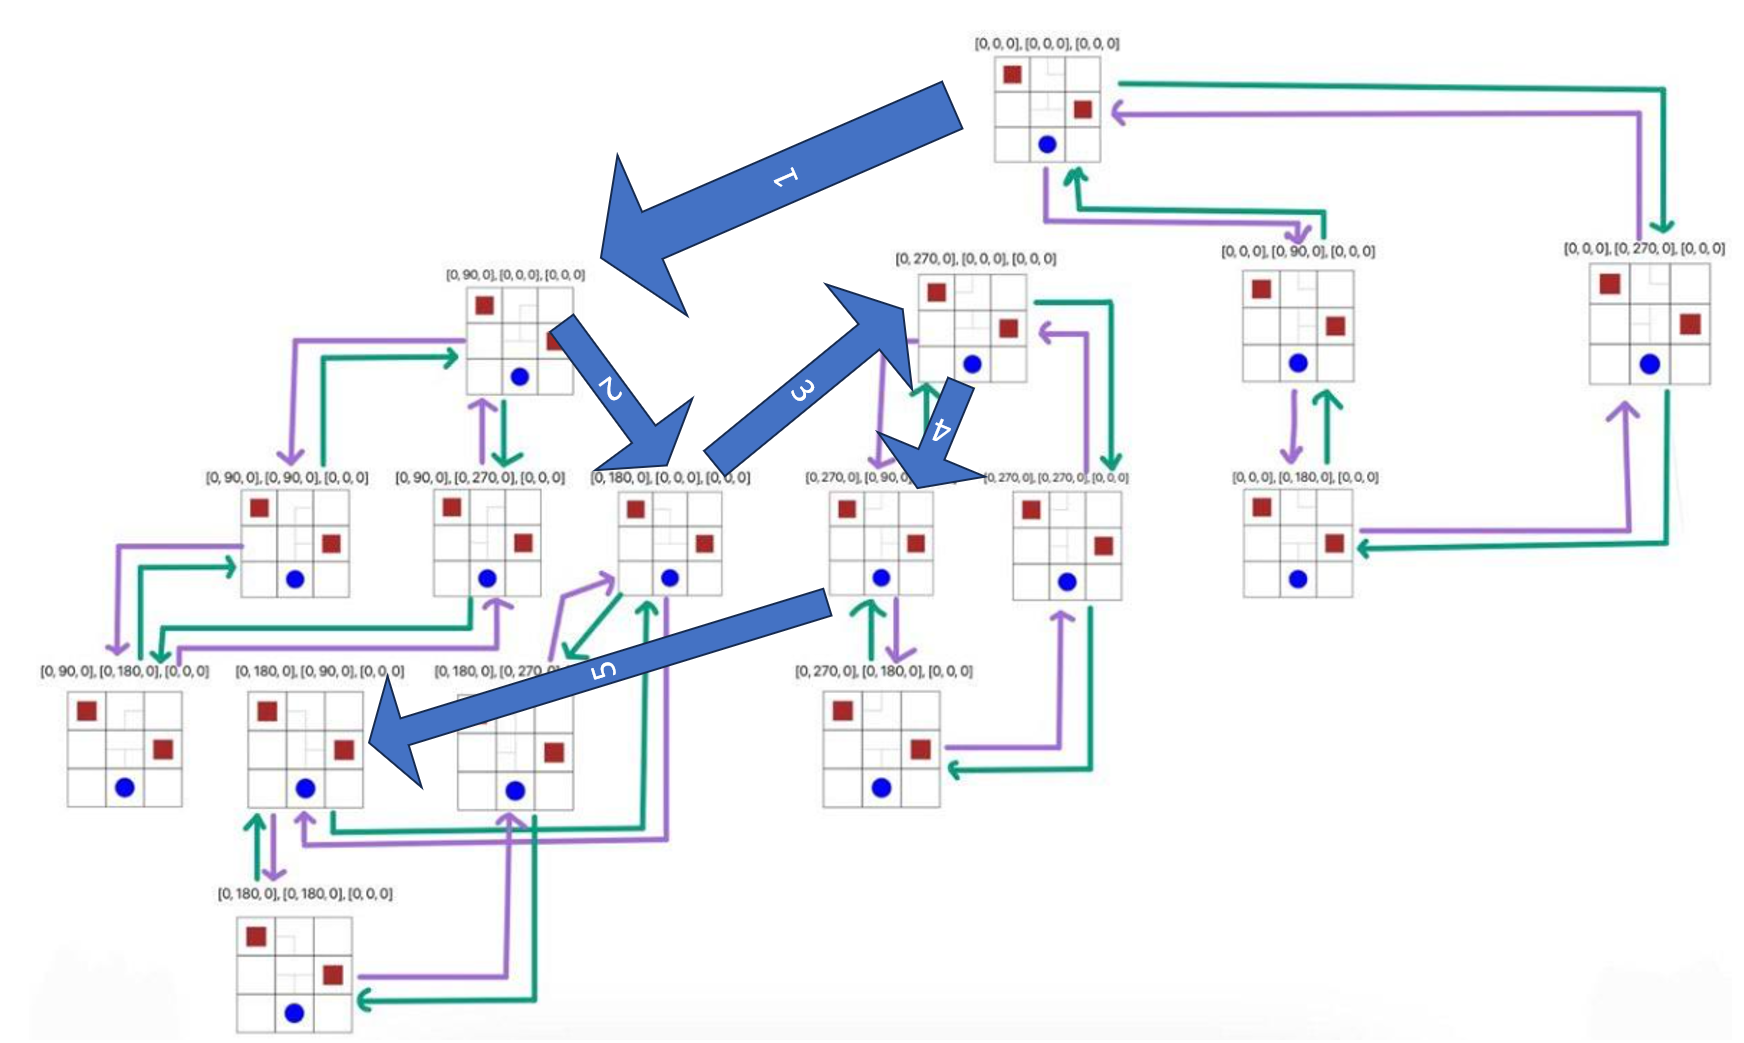

While it doesn't seem like a depth first search, you can see that it can be formed into a chain, imitating a depth first search

In [14]:
# Function to check if the given state is equal to the goal state
def is_goal_state(state, goal_state):
    return state == goal_state

# Depth-First Search algorithm
def depth_first_search(current_state, goal_state, graph, visited=None, path=None):
    if visited is None:
        visited = set()
    if path is None:
        path = []

    # Convert the current state to a string for hashing
    current_state_str = str(current_state)

    if current_state_str in visited:
        return None, visited  # Avoid revisiting the same state

    visited.add(current_state_str)
    path.append(current_state)
    
    if is_goal_state(current_state, goal_state):
        return path, visited  # Goal state found

    # Explore neighbors recursively
    for neighbor in graph.get(current_state, []):
        solution, visited = depth_first_search(neighbor, goal_state, graph, visited, path)
        if solution:
            return solution, visited

    # Backtrack if no solution found from this state
    path.pop()

    return None, visited  # No solution found


Total number of combinations: 56
Number of combinations made:  12
Percentage of combinations visited:  21.428571428571427 %
Total number of combinations for solution path:  6
Percentage of combinations in solution path:  10.714285714285714 %

Visited States:
((0, 90, 0), (0, 0, 0), (0, 0, 0))
((0, 180, 0), (0, 0, 0), (0, 0, 0))
((0, 270, 0), (0, 0, 0), (0, 0, 0))
((0, 270, 0), (0, 90, 0), (0, 0, 0))
((0, 180, 0), (0, 90, 0), (0, 0, 0))
((0, 0, 0), (0, 0, 0), (0, 0, 0))

Solution Path:
((0, 0, 0), (0, 0, 0), (0, 0, 0))


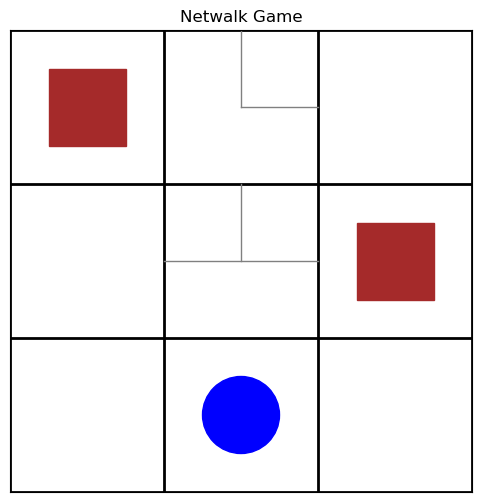

((0, 90, 0), (0, 0, 0), (0, 0, 0))


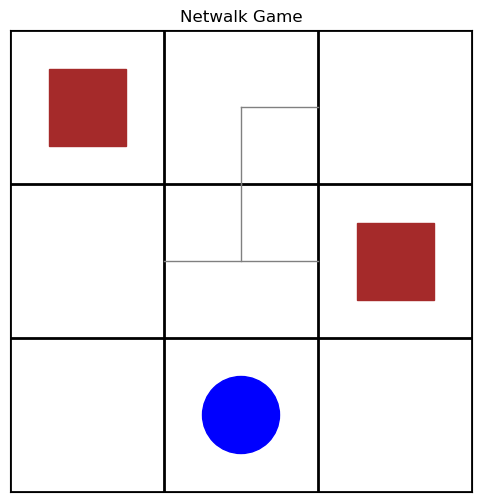

((0, 180, 0), (0, 0, 0), (0, 0, 0))


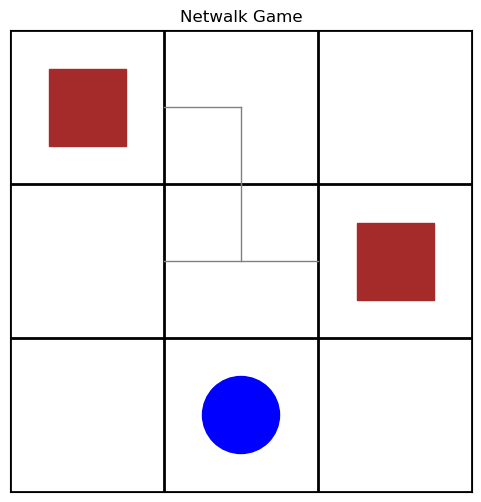

((0, 270, 0), (0, 0, 0), (0, 0, 0))


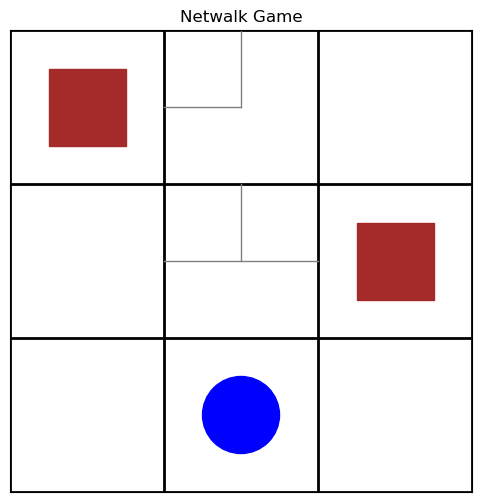

((0, 270, 0), (0, 90, 0), (0, 0, 0))


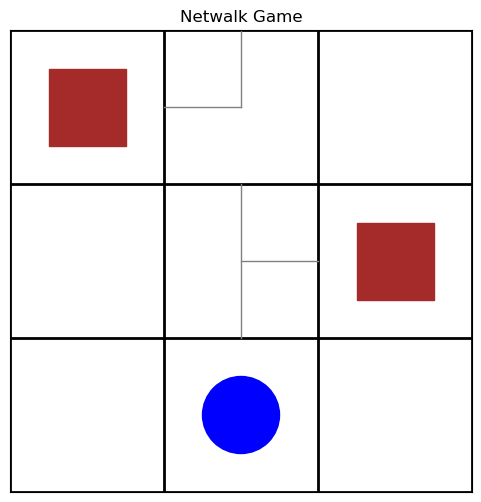

((0, 180, 0), (0, 90, 0), (0, 0, 0))


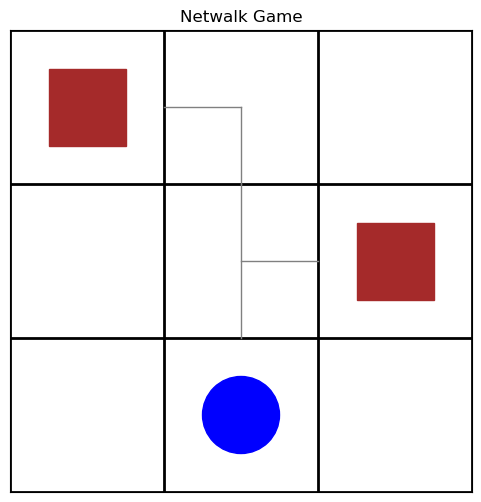

In [15]:
# Perform Depth-First Search
solution_path, visited_states = depth_first_search(start_state, goal_state, graphG)

# Print the visited states
print("Total number of combinations: 56")
print("Number of combinations made: ", len(visited_states) + len(solution_path))
print("Percentage of combinations visited: ", ((len(visited_states) + len(solution_path))/(56))*100, "%")
print("Total number of combinations for solution path: ", len(solution_path))
print("Percentage of combinations in solution path: ", ((len(solution_path))/(56))*100, "%")
print()

print("Visited States:")
for state in visited_states:
    print(state)

# Print the solution path
if solution_path:
    print("\nSolution Path:")
    for state in solution_path:
        print(state)
        visualize_netwalk(grid_config, state)
else:
    print("No solution found.")

We can see that DFS is much more efficient than BFS, and again, it would be due to the graph structure. What I observed was that in the graph structure, the next rotation is only possible from the previous rotation, hence having a depth first search would lead to the solution path much more quicker.

This may not be the case everywhere, but in ours due to our problem description and graph arrangement, DFS seems to be more efficient.

## Depth Limited Search ⚠️

Depth Limited Search (DLS) traverses the graph in the same manner as depth first, however it has a depth limitation to it. For instance, with a decalared depth, it finds a way to get to the solution while maintaining that depth. This illustration best describes DLS:

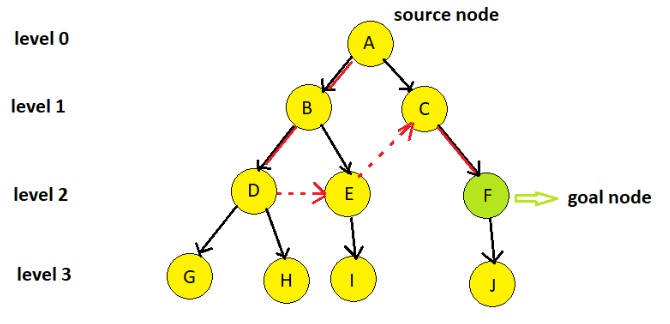

For instance, if it were a depth first search, the the order of traversal would be 

A-B-D-G-H-E-I-C-F

However, when a depth limit of 2 is declared, notice how the traversal in terms of depth stops at level 2. So the traversal would be

A-B-D-E-C-F

Which is much shorter and efficient.

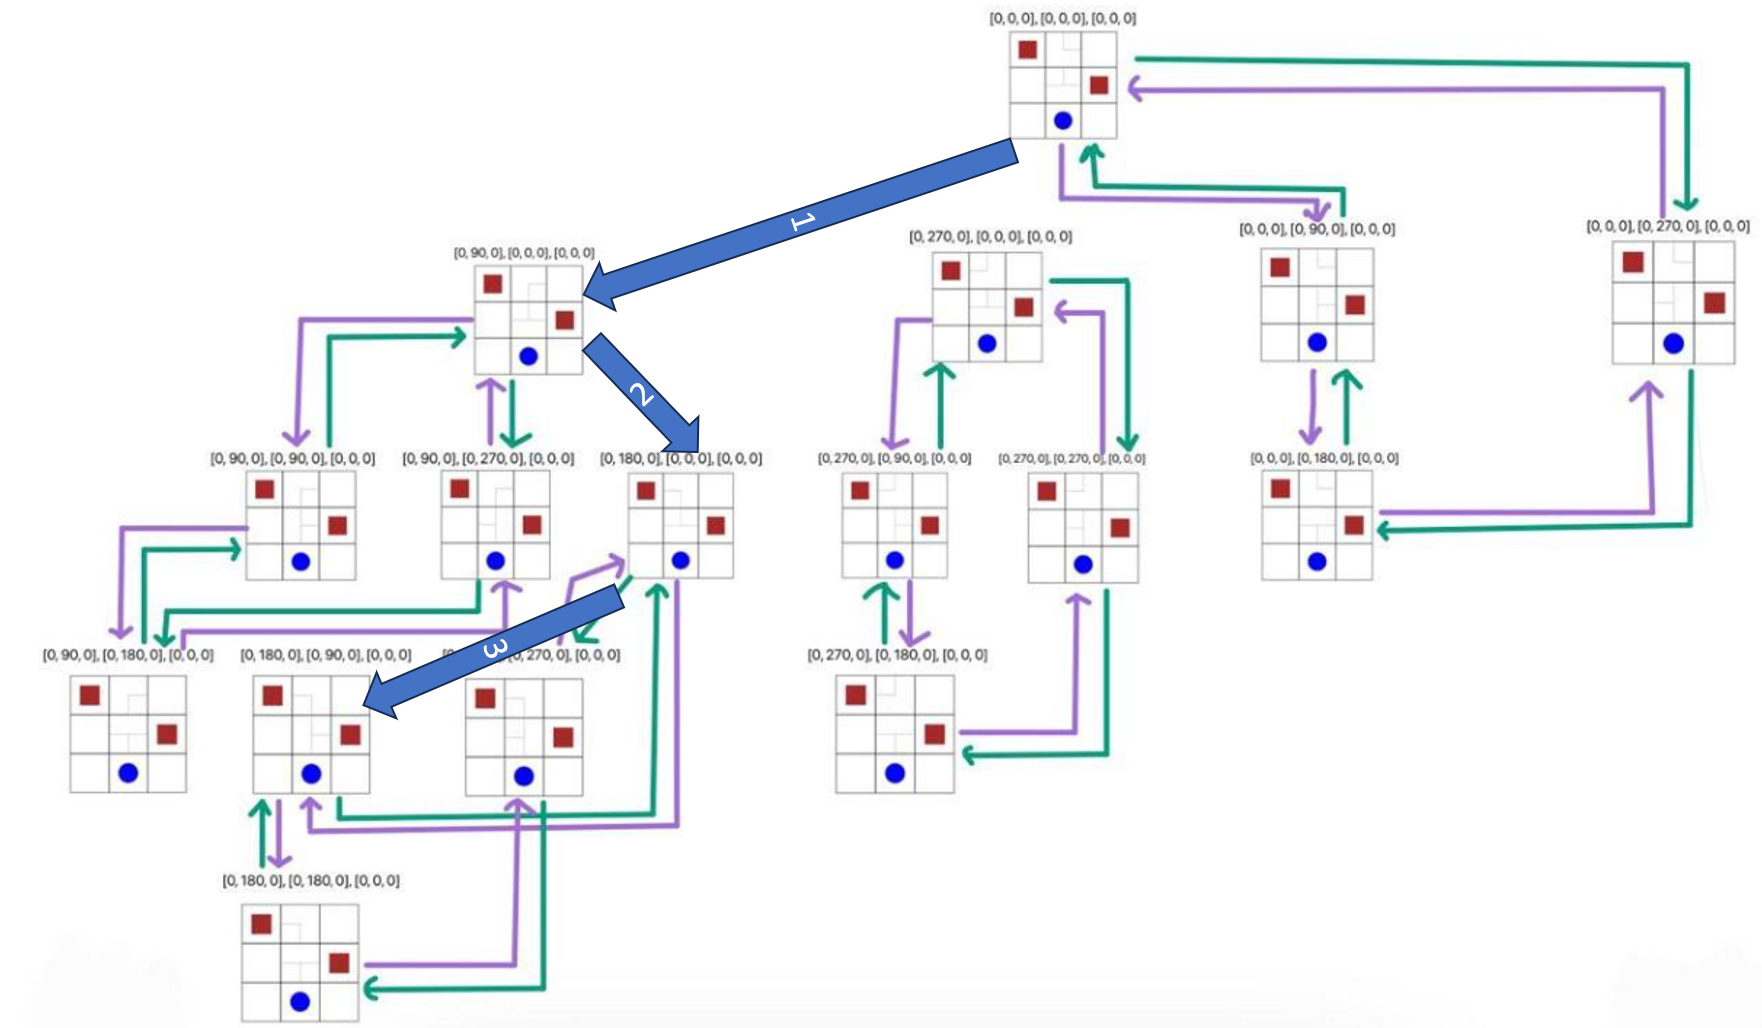

As you can see, the depth is limited to 3, and hence it chooses the optimal path based on this limit.

You can cross check the connection from teh pink and blue diagram.

In [16]:
# Function to check if the given state is equal to the goal state
def is_goal_state(state, goal_state):
    return state == goal_state

# Depth-Limited Search algorithm
def depth_limited_search(current_state, goal_state, successors, depth_limit, visited=None, path=None):
    if visited is None:
        visited = set()
    if path is None:
        path = []

    # Convert the states to strings for hashing
    current_state_str = str(current_state)
    goal_state_str = str(goal_state)

    if current_state_str in visited or len(path) > depth_limit:
        return None, visited  # Avoid revisiting the same state or exceed depth limit

    visited.add(current_state_str)
    path.append(current_state)
    
    if is_goal_state(current_state, goal_state):
        return path, visited  # Goal state found

    # Explore successors recursively up to the depth limit
    for successor in successors.get(current_state, []):
        solution, visited = depth_limited_search(successor, goal_state, successors, depth_limit, visited, path)
        if solution:
            return solution, visited

    # Backtrack if no solution found from this state
    path.pop()

    return None, visited  # No solution found


Total number of combinations: 56
Number of combinations made:  9
Percentage of combinations visited:  16.071428571428573 %
Total number of combinations for solution path:  4
Percentage of combinations in solution path:  7.142857142857142 %

Solution Path:
((0, 0, 0), (0, 0, 0), (0, 0, 0))


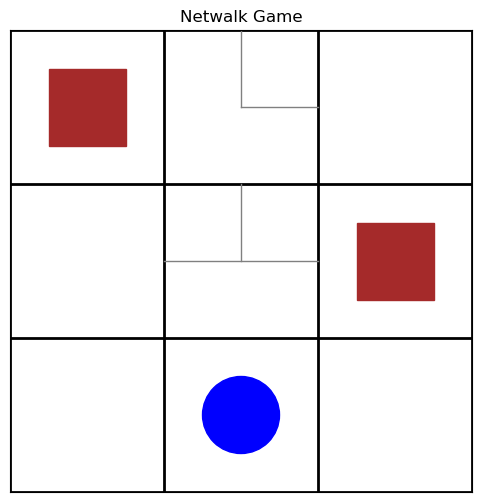

((0, 90, 0), (0, 0, 0), (0, 0, 0))


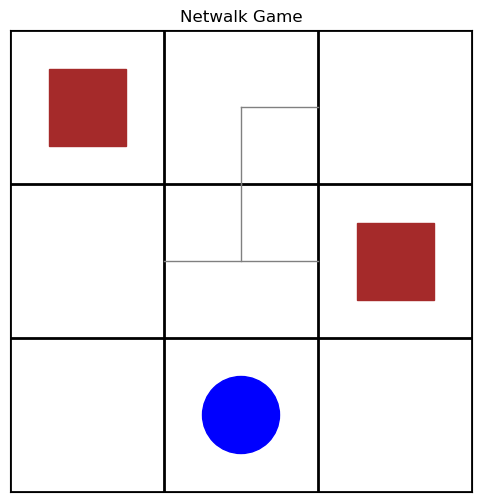

((0, 180, 0), (0, 0, 0), (0, 0, 0))


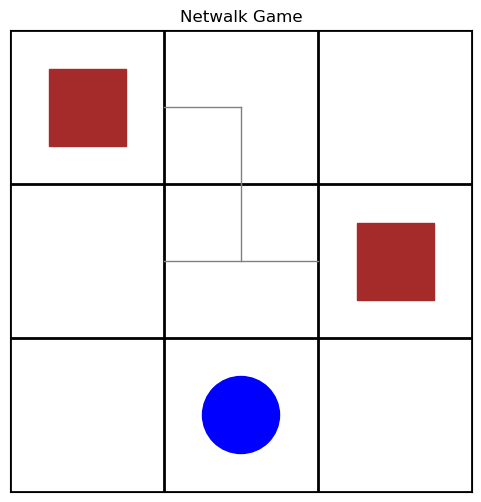

((0, 180, 0), (0, 90, 0), (0, 0, 0))


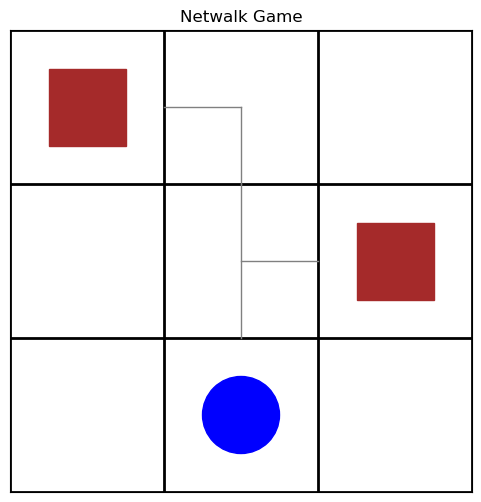


Visited States:
((0, 90, 0), (0, 0, 0), (0, 0, 0))
((0, 180, 0), (0, 0, 0), (0, 0, 0))
((0, 270, 0), (0, 0, 0), (0, 0, 0))
((0, 180, 0), (0, 90, 0), (0, 0, 0))
((0, 0, 0), (0, 0, 0), (0, 0, 0))


In [17]:
# Depth limit for the search
depth_limit = 3

# Perform depth-limited search
solution_path, visited_states = depth_limited_search(start_state, goal_state, graphG, depth_limit)

# Print the visited states
print("Total number of combinations: 56")
print("Number of combinations made: ", len(visited_states) + len(solution_path))
print("Percentage of combinations visited: ", ((len(visited_states) + len(solution_path))/(56))*100, "%")
print("Total number of combinations for solution path: ", len(solution_path))
print("Percentage of combinations in solution path: ", ((len(solution_path))/(56))*100, "%")
print()

# Print the solution path and visited states
if solution_path:
    print("Solution Path:")
    for state in solution_path:
        print(state)
        visualize_netwalk(grid_config, state)
        
else:
    print("No solution found within the depth limit.")

print("\nVisited States:")
for state in visited_states:
    print(state)


As you can see from the statistics, the number of nodes visited is much lesser with the depth constraint at 3. In fact, the number of nodes in the solution is also at 4, which is the most efficient one so far. 

Again, as mentioned before, the graph for the problem is more suitable for a DFS, and adding a limitation with DLS makes it even more efficient. This is the efficient one so far!

## Uniform Cost Search 💲

Uniform Cost Searchh (UCS) takes into consideration the cost to get to the goal from the graph structure. The algorithm will take the path that is the least cost from the initial state to the goal state. Take this graph for **example**:

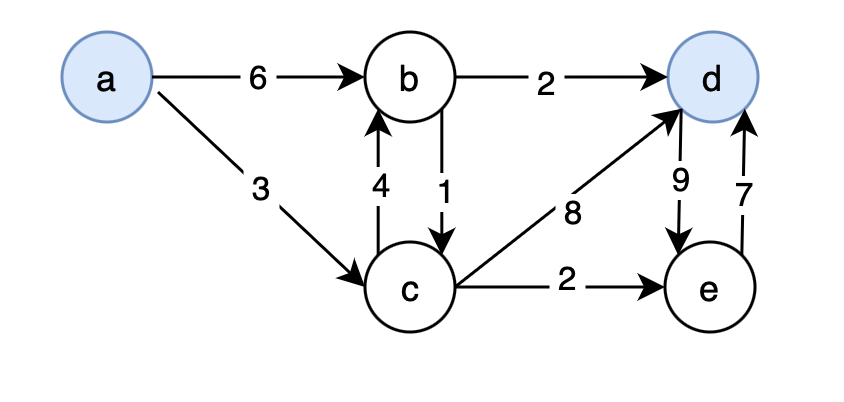

To go from A-D, the algorithm will take the paths with the least cost. In this case, it would be 6+2 | A-B-D

In [18]:
# Function to perform Uniform Cost Search
def uniform_cost_search(graph, start, goal):
    visited = set()  # Set to keep track of visited nodes
    pq = []  # Priority queue to store nodes based on path cost
    heapq.heappush(pq, (0, start, [start]))  # Push start node to priority queue
    while pq:
        cost, node, path = heapq.heappop(pq)  # Pop node with lowest cost
        if node == goal:
            return path, visited  # Return path if goal is reached
        if node not in visited:
            visited.add(node)  # Mark node as visited
            for neighbor, edge_cost in graph[node]:
                if neighbor not in visited:
                    heapq.heappush(pq, (cost + edge_cost, neighbor, path + [neighbor]))  # Push neighbor to priority queue
    return None  # Return None if no path exists


Total number of combinations: 56
Number of combinations made:  12
Percentage of combinations visited:  21.428571428571427 %
Total number of combinations for solution path:  4
Percentage of combinations in solution path:  7.142857142857142 %

Path found: [((0, 0, 0), (0, 0, 0), (0, 0, 0)), ((0, 90, 0), (0, 0, 0), (0, 0, 0)), ((0, 180, 0), (0, 0, 0), (0, 0, 0)), ((0, 180, 0), (0, 90, 0), (0, 0, 0))]

((0, 0, 0), (0, 0, 0), (0, 0, 0))


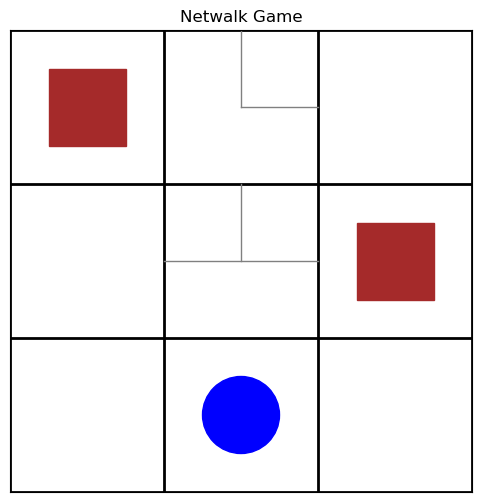

((0, 90, 0), (0, 0, 0), (0, 0, 0))


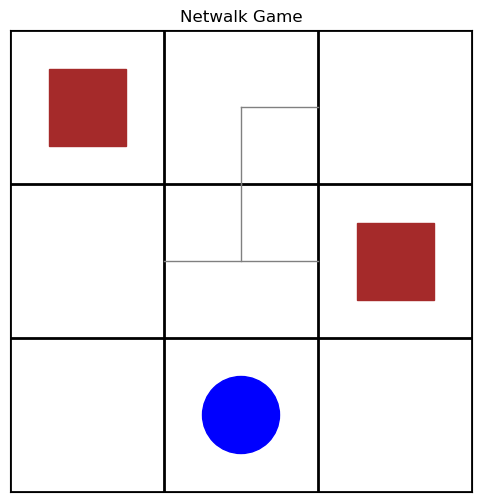

((0, 180, 0), (0, 0, 0), (0, 0, 0))


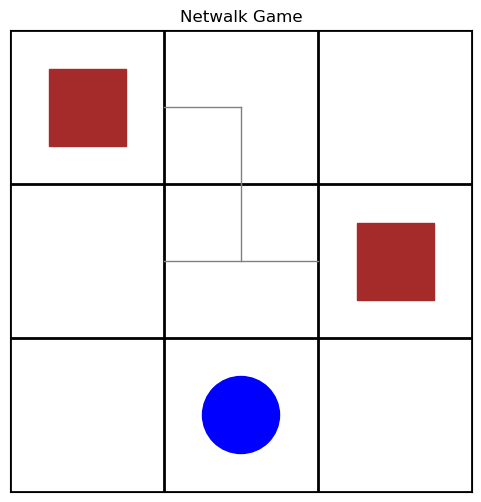

((0, 180, 0), (0, 90, 0), (0, 0, 0))


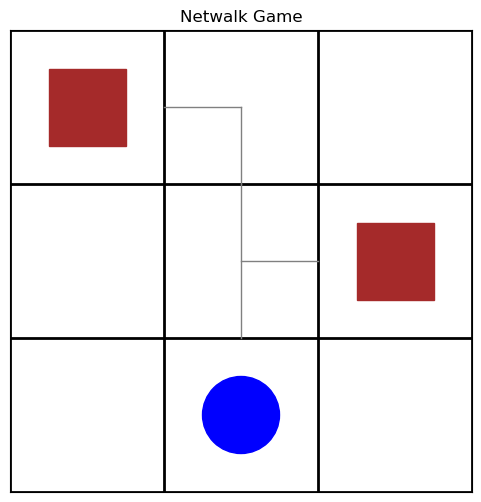

In [19]:
path, visited = uniform_cost_search(graph, start_state, goal_state)

# Print the visited states
print("Total number of combinations: 56")
print("Number of combinations made: ", len(visited) + len(path))
print("Percentage of combinations visited: ", ((len(visited) + len(path))/(56))*100, "%")
print("Total number of combinations for solution path: ", len(path))
print("Percentage of combinations in solution path: ", ((len(path))/(56))*100, "%")
print()
if path:
    print("Path found:", path)
    print()
    for pa in path:
        print(pa)
        visualize_netwalk(grid_config, pa)
else:
    print("No path exists.")

Honestly, I expected this to be the most efficient algorithm, but it seems like the number of nodes visited is quite high even the the solution path is comparable to DLS. For instance, the graph just considers the cost of each path taken, but still traverses through quite a few nodes.

## Iterative Deepening Search 🔁

Iterative Deepening Search (IDS) is a combination of DFS and BFS. To make it clearer, it performs BFS while traversing as a DFS algorithm.

In [20]:
def return_dfs_node(node, goal_state, depth_limit, graph, visited=None):
    # Initialize the set of visited nodes if it's not provided
    if visited is None:
        visited = set()

    # Mark the current node as visited
    visited.add(node)

    # Check if the current node is the goal state
    if node == goal_state:
        return [node], visited

    # Check if the depth limit has been reached
    if depth_limit == 0:
        return None, visited

    # Get the successors of the current node from the graph
    successors = graph.get(node, [])
    for successor, cost in successors:
        # Check if the successor has not been visited
        if successor not in visited:
            # Recursively call the function with the successor node
            result, visited = return_dfs_node(successor, goal_state, depth_limit - 1, graph, visited)
            # If the result is found, return the path
            if result is not None:
                return [node] + result, visited

    # If the goal state is not found within the depth limit, return None
    return None, visited

def iterative_deepening_search(start_state, goal_state, graph):
    depth_limit = 0
    # Iteratively increase the depth limit until the goal state is found
    while True:
        # Call the DFS function with the current depth limit
        result, visited = return_dfs_node(start_state, goal_state, depth_limit, graph)
        # If the goal state is found, return the path
        if result is not None:
            return result, visited
        # Increment the depth limit for the next iteration
        depth_limit += 1


Total number of combinations: 56
Number of combinations made:  9
Percentage of combinations visited:  16.071428571428573 %
Total number of combinations for solution path:  4
Percentage of combinations in solution path:  7.142857142857142 %

Visited paths:  {((0, 90, 0), (0, 0, 0), (0, 0, 0)), ((0, 180, 0), (0, 0, 0), (0, 0, 0)), ((0, 270, 0), (0, 0, 0), (0, 0, 0)), ((0, 180, 0), (0, 90, 0), (0, 0, 0)), ((0, 0, 0), (0, 0, 0), (0, 0, 0))}

Solution Path: [((0, 0, 0), (0, 0, 0), (0, 0, 0)), ((0, 90, 0), (0, 0, 0), (0, 0, 0)), ((0, 180, 0), (0, 0, 0), (0, 0, 0)), ((0, 180, 0), (0, 90, 0), (0, 0, 0))]

((0, 0, 0), (0, 0, 0), (0, 0, 0))


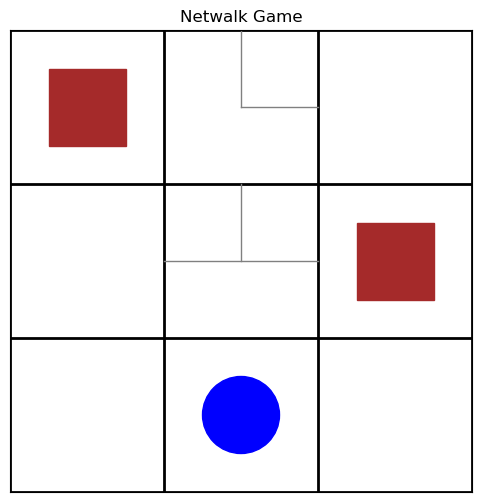

((0, 90, 0), (0, 0, 0), (0, 0, 0))


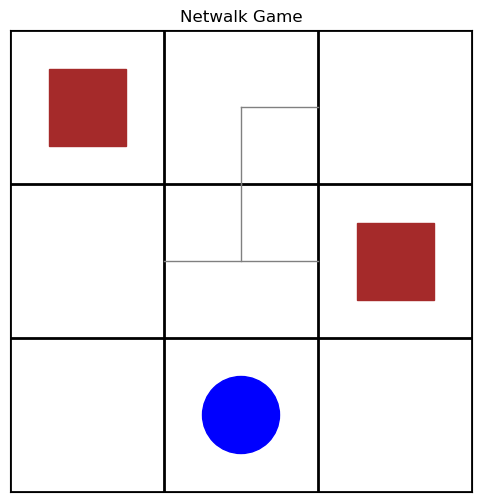

((0, 180, 0), (0, 0, 0), (0, 0, 0))


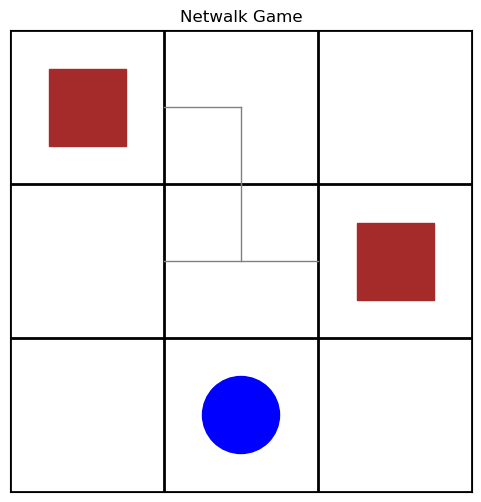

((0, 180, 0), (0, 90, 0), (0, 0, 0))


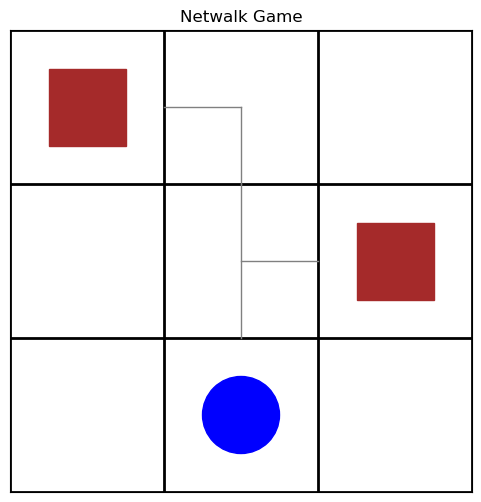

In [21]:
solution_path, visited = iterative_deepening_search(start_state, goal_state, graph)

# Print the visited states
print("Total number of combinations: 56")
print("Number of combinations made: ", len(visited) + len(solution_path))
print("Percentage of combinations visited: ", ((len(visited) + len(solution_path))/(56))*100, "%")
print("Total number of combinations for solution path: ", len(solution_path))
print("Percentage of combinations in solution path: ", ((len(solution_path))/(56))*100, "%")
print()
print("Visited paths: ", visited)
print()
print("Solution Path:", solution_path)
print()
for path in solution_path:
    print(path)
    visualize_netwalk(grid_config, path)

From the stats, this seems to be the tied with most efficient algorithm, DLS, with 9 state visits and 4 states to goal state. This is surprising to me as BFS was an inefficient algorithm due to the graph structure and problem definition, and DFS seemed to be one of the better performing algorithms compared to BFS. 

<div class="alert alert-block alert-success">
<b> Here are the Rankings! </b><br>
    
<i>As per Visited Nodes from least nodes visited to most nodes visited:</i><br>
1. `IDS`, `DLS` <br>
2. `UCS`, `DFS`<br>
3. `BFS`<br>
    
<i>As per number of nodes in solution path from least nodes to most nodes:</i><br>
    1. `IDS`, `UCS`, `DLS`<br>
    2. `DFS`<br>
    3. `BFS`
<br><br>
<b>Overall Champion</b>
`IDS` and `DLS`
    


# Informed Searches 🧡

Informed searches have problem-specific knowledge that it can use to make the most efficient decision when searching.  

In this section, we will be taking a look at 2 different implementations of informed searches:
1. Greedy Search
2. A* Search

## Greedy Search 🐍

As mentioned, Greedy Search (GS) is an informed search, and hence would need problem specific knowledge to take the most optimal path from the intial state to the final state. 

For the problem specific knowledge, we will be using manhattan distance with a bit of a twist. For instance, manhattan distance subtracts the final state from the next node and take the least distance. In our case, we are taking the rotation of the nieghbouring node, and calculating the shortest rotation to get to the goal.

In [22]:
def manhattan_distance_heuristic(current_state, goal_state):
    total_distance = 0
    for i in range(len(current_state)):
        row_distance = 0
        for j in range(len(current_state[0])):
            # Check if the current tile is one of the tiles that need rotating
            if (i == 0 and j == 1) or (i == 1 and j == 1):
                current_orientation = current_state[i][j]
                goal_orientation = goal_state[i][j]
                # Calculate Manhattan distance for this tile
                distance = abs(current_orientation - goal_orientation)
                row_distance += distance
        print("Manhattan distance for row", i+1, ":", row_distance)
        total_distance += row_distance
    return total_distance


((0, 90, 0), (0, 0, 0), (0, 0, 0))
Manhattan distance for row 1 : 90
Manhattan distance for row 2 : 90
Manhattan distance for row 3 : 0

((0, 270, 0), (0, 0, 0), (0, 0, 0))
Manhattan distance for row 1 : 90
Manhattan distance for row 2 : 90
Manhattan distance for row 3 : 0

((0, 0, 0), (0, 90, 0), (0, 0, 0))
Manhattan distance for row 1 : 180
Manhattan distance for row 2 : 0
Manhattan distance for row 3 : 0

((0, 0, 0), (0, 270, 0), (0, 0, 0))
Manhattan distance for row 1 : 180
Manhattan distance for row 2 : 180
Manhattan distance for row 3 : 0

Step 1 : Selected state: ((0, 90, 0), (0, 0, 0), (0, 0, 0))


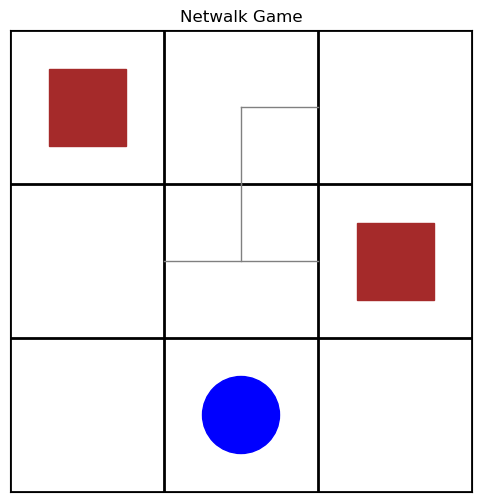

((0, 0, 0), (0, 0, 0), (0, 0, 0))
Manhattan distance for row 1 : 180
Manhattan distance for row 2 : 90
Manhattan distance for row 3 : 0

((0, 180, 0), (0, 0, 0), (0, 0, 0))
Manhattan distance for row 1 : 0
Manhattan distance for row 2 : 90
Manhattan distance for row 3 : 0

((0, 90, 0), (0, 90, 0), (0, 0, 0))
Manhattan distance for row 1 : 90
Manhattan distance for row 2 : 0
Manhattan distance for row 3 : 0

((0, 90, 0), (0, 270, 0), (0, 0, 0))
Manhattan distance for row 1 : 90
Manhattan distance for row 2 : 180
Manhattan distance for row 3 : 0

Step 2 : Selected state: ((0, 180, 0), (0, 0, 0), (0, 0, 0))


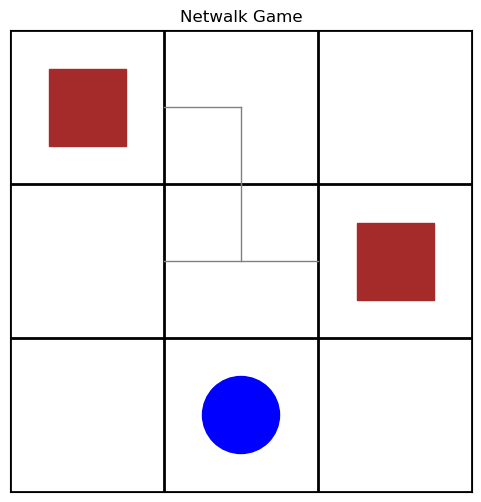

((0, 270, 0), (0, 0, 0), (0, 0, 0))
Manhattan distance for row 1 : 90
Manhattan distance for row 2 : 90
Manhattan distance for row 3 : 0

((0, 90, 0), (0, 0, 0), (0, 0, 0))
Manhattan distance for row 1 : 90
Manhattan distance for row 2 : 90
Manhattan distance for row 3 : 0

((0, 180, 0), (0, 90, 0), (0, 0, 0))
Manhattan distance for row 1 : 0
Manhattan distance for row 2 : 0
Manhattan distance for row 3 : 0

((0, 180, 0), (0, 270, 0), (0, 0, 0))
Manhattan distance for row 1 : 0
Manhattan distance for row 2 : 180
Manhattan distance for row 3 : 0

Step 3 : Selected state: ((0, 180, 0), (0, 90, 0), (0, 0, 0))


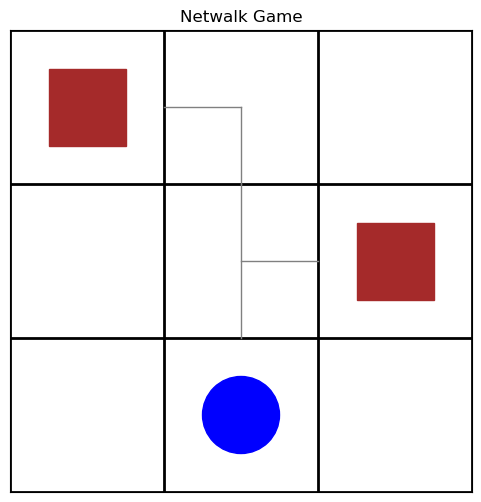

Goal state reached


In [23]:
def greedy_search(start_state, goal_state, graph):
    # Initialize the current state with the start state
    current_state = start_state
    # Initialize step counter
    step = 1
    
    # Continue until the current state is the goal state
    while current_state != goal_state:
        # Get neighbors of the current state from the graph
        neighbors = graph[current_state]
        # Initialize variables to track the best neighbor and its heuristic value
        min_heuristic_value = float('inf')
        best_neighbor = None
        
        # Iterate through the neighbors to find the one with the lowest heuristic value
        for neighbor in neighbors:
            # Calculate the heuristic value for the neighbor
            print(neighbor)
            heuristic_value = manhattan_distance_heuristic(neighbor, goal_state)
            print()
            # Update the best neighbor if the current neighbor has a lower heuristic value
            if heuristic_value < min_heuristic_value:
                min_heuristic_value = heuristic_value
                best_neighbor = neighbor
        
        # Update the current state with the best neighbor found
        current_state = best_neighbor
        
        # Print selected state and visualize it
        print("Step", step, ": Selected state:", current_state)
        visualize_netwalk(grid_config, current_state)
        step += 1
    
    # Print a message when the goal state is reached
    print("Goal state reached")

# Perform greedy search
greedy_search(start_state, goal_state, graphG)


With the GS, it takes the path with the least number of rotations, this way, it does not have to traverse through other nodes that do not to be taken into consideration. So in this case, the visited nodes, and the solution path both are 4, which technically puts it at the top of the list.

## A* Search 🅰️

A* Search uses cost and heuristic function. In our case, we used the same heuristic function as manhattan distance, and the cost function mentioned in the graph used for UCS.

Manhattan distance for row 1 : 180
Manhattan distance for row 2 : 90
Manhattan distance for row 3 : 0
Visiting state: ((0, 0, 0), (0, 0, 0), (0, 0, 0))


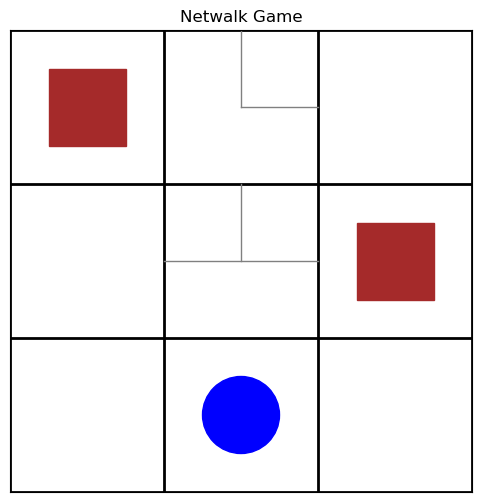

((0, 90, 0), (0, 0, 0), (0, 0, 0))
Manhattan distance for row 1 : 90
Manhattan distance for row 2 : 90
Manhattan distance for row 3 : 0

((0, 270, 0), (0, 0, 0), (0, 0, 0))
Manhattan distance for row 1 : 90
Manhattan distance for row 2 : 90
Manhattan distance for row 3 : 0

((0, 0, 0), (0, 90, 0), (0, 0, 0))
Manhattan distance for row 1 : 180
Manhattan distance for row 2 : 0
Manhattan distance for row 3 : 0

((0, 0, 0), (0, 270, 0), (0, 0, 0))
Manhattan distance for row 1 : 180
Manhattan distance for row 2 : 180
Manhattan distance for row 3 : 0

Visiting state: ((0, 90, 0), (0, 0, 0), (0, 0, 0))


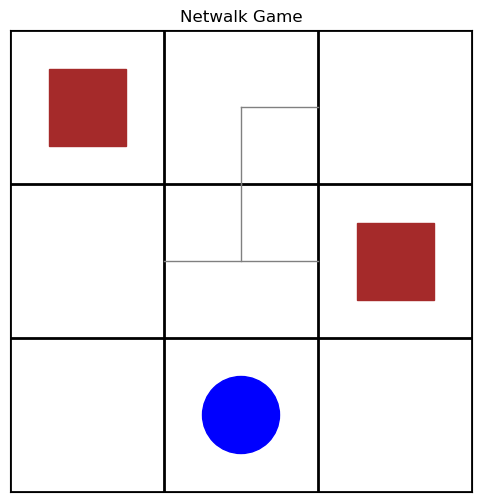

((0, 180, 0), (0, 0, 0), (0, 0, 0))
Manhattan distance for row 1 : 0
Manhattan distance for row 2 : 90
Manhattan distance for row 3 : 0

((0, 90, 0), (0, 90, 0), (0, 0, 0))
Manhattan distance for row 1 : 90
Manhattan distance for row 2 : 0
Manhattan distance for row 3 : 0

((0, 90, 0), (0, 270, 0), (0, 0, 0))
Manhattan distance for row 1 : 90
Manhattan distance for row 2 : 180
Manhattan distance for row 3 : 0

Visiting state: ((0, 180, 0), (0, 0, 0), (0, 0, 0))


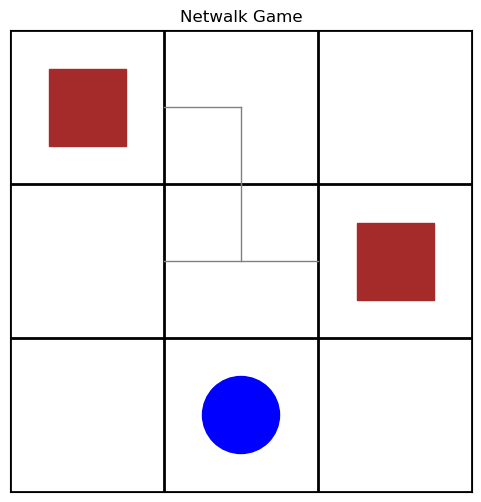

((0, 180, 0), (0, 90, 0), (0, 0, 0))
Manhattan distance for row 1 : 0
Manhattan distance for row 2 : 0
Manhattan distance for row 3 : 0

((0, 180, 0), (0, 270, 0), (0, 0, 0))
Manhattan distance for row 1 : 0
Manhattan distance for row 2 : 180
Manhattan distance for row 3 : 0

Goal state reached: ((0, 180, 0), (0, 90, 0), (0, 0, 0))


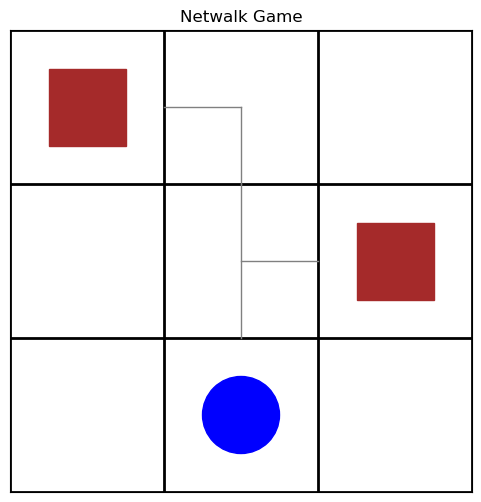

In [24]:
def a_star_search(start_state, goal_state, graph):
    # Initialize priority queue to store open set of nodes to explore
    open_set = PriorityQueue()
    # Add the start state to the open set with a priority of 0
    open_set.put((0, start_state))
    # Initialize dictionary to store the parent of each node
    came_from = {}
    # Initialize dictionary to store the cost of reaching each node from the start state
    g_score = {node: float('inf') for node in graph}
    g_score[start_state] = 0
    # Initialize dictionary to store the total estimated cost of reaching each node
    f_score = {node: float('inf') for node in graph}
    f_score[start_state] = manhattan_distance_heuristic(start_state, goal_state)
    
    # Main loop to explore nodes
    while not open_set.empty():
        # Get the node with the lowest f-score from the open set
        _, current_state = open_set.get()
        
        # If the current node is the goal state, print and visualize it, then return
        if current_state == goal_state:
            print("Goal state reached:", current_state)
            visualize_netwalk(grid_config, current_state)
            return
        
        # Print and visualize the current node
        print("Visiting state:", current_state)
        visualize_netwalk(grid_config, current_state)
        
        # Explore neighbors of the current node
        for neighbor, cost in graph[current_state]:
            # Calculate the tentative g-score for the neighbor
            tentative_g_score = g_score[current_state] + cost
            # If this path to the neighbor is better than any previous one, update scores
            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current_state
                g_score[neighbor] = tentative_g_score
                print(neighbor)
                f_score[neighbor] = tentative_g_score + manhattan_distance_heuristic(neighbor, goal_state)
                print()
                # Add the neighbor to the open set with its priority set to its f-score
                open_set.put((f_score[neighbor], neighbor))
    
    # If the open set is empty and no goal state is found, print a message
    print("No path found")


# Call the A* search algorithm
a_star_search(start_state, goal_state, graph)


For the A* Search, it takes the cost and the rotations into consideration. Because the problem is defined in a way where the shortest path aka the path with the least rotations will have the least cost, it will show similar results to Greedy search. However, if the mappings were changed where there was no direct path from inital to goal state, GS would definitely be better if the cost were to vary. 

While both are good, it seems that A* would be more optimal considering it takes both cost and rotations while finding the path, but in our case, it is the same as GS, which is an unfortunate tie.

<div class="alert alert-block alert-success">
<b> Here are the Rankings! </b><br>
    
<i>As per Visited Nodes from least nodes visited to most nodes visited:</i><br>
1. `GS`, `A*` <br>

    
<i>As per number of nodes in solution path from least nodes to most nodes:</i><br>
    1. `GS`, `A*`
 
<br><br>
<b>Overall Champion</b>
`GS` and `A*`
    

***

# Conclusion 💛

Now that we have seen the nodes visited, the nodes in the solution path, we can now decide the most efficient algorithm.

| Search Algorithm | # Visited Nodes | # Nodes in Solution Path |
|----|----|---|
| A* Search | 4 | 4 |
| Greedy Search | 4 | 4|
| Iterative Deepening Search | 9 | 4 |
| Depth Limited Search | 9 | 4 |
| Uniform Cost Search | 12 | 4 |
| Depth First Search | 12 | 6 |
| Breadth First Search | 12 | 12 |

***

# Youtube Video

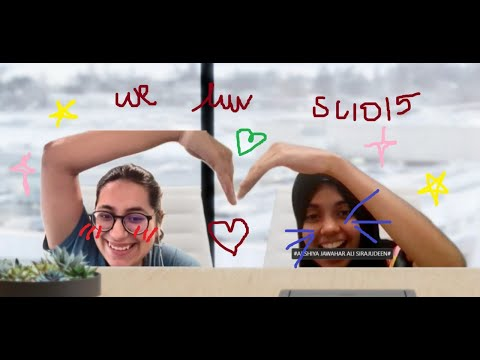

In [25]:
from IPython.display import YouTubeVideo

YouTubeVideo('f-r2OgWu92Y', width=800, height=300)

# <center>THANKS!!!! 🎊